In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [182]:
chart_size= [10,10]

## Managing Dependencies Before Get Started:

In [183]:
# check if packages are installed: open conda prompt and run:

# conda search scipy
# conda search matplotlib
# conda search seaborn
# verify package version: sea.__version__ (example using seaborn)

# installing packages:

# when you code using main env:
# conda install scipy
# or (specific version):
# conda install scipy=0.15.0

# when you code in many environments (rare):
# conda install --name myenv scipy


# Listas Úteis

In [184]:
cover         = ['CE', 'CQ']

fresh_clean   = ['HC', 'HF', 'IC', 'IF']
str_ore       = ['HC', 'HF', 'IC', 'IF']
ore_rocks     = ['CE', 'HC', 'HF', 'IC', 'IF']
basin_rocks   = ['IC', 'IF']

teores_gl     = ['fegl', 'sigl', 'pgl', 'algl', 'mngl', 'pfgl', 'tigl', 'mggl', 'cagl']
faixas        = ['g1', 'g1a', 'g1b', 'g2', 'g3']
param_event   = ['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL', 'G1', 'G1A', 'G1B', 'G2', 'G3']

not_countable = ['FURO','NA','DE','ATE','CLV','CLM','FLX_AN','FLX_AN_OR','DA_ANA','DA_SAM','d_agru','tipo_am','global','mass_t','status']

In [185]:
cover

['CE', 'CQ']

## Load data

In [186]:
fso = pd.read_csv('SL1_ASSAY_14052021.csv', low_memory=False, na_values='-99', encoding="latin1")

In [187]:
#amf = pd.read_csv('abo_0720_amf_fso_assay.csv', low_memory=False, na_values='-99')

In [188]:
#cac = pd.read_csv('aboabo_cac_entry.csv', low_memory=False, na_values='-99')

In [189]:
fso.head()

,PROJETO,TIPO_FURO,FURO,NA,DE,ATE,COMP,TIPO,CLV,CLV_ORI,CLM,CLI,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,TIGL,MGGL,CAGL,KGL,CUGL,FOGL,HGL,G1,G1A,G1B,G2,G2A,G2B,G3,FE1,SI11,P1,AL1,MN1,PF1,TI1,MG1,CA1,K1,CU1,FO1,FE1A,SI1A,P1A,AL1A,MN1A,PF1A,TI1A,MG1A,CA1A,K1A,CU1A,FO1A,FE1B,SI1B,P1B,AL1B,MN1B,PF1B,TI1B,MG1B,CA1B,K1B,CU1B,FO1B,FE2,SI2,P2,AL2,MN2,PF2,TI1.1,MG2,CA2,K2,CU2,FO2,FE2A,SI2A,P2A,AL2A,MN2A,PF2A,TI2A,MG2A,CA2A,K2A,CU2A,FO2A,FE2B,SI2B,P2B,AL2B,MN2B,PF2B,TI2B,MG2B,CA2B,K2B,CU2B,FO2B,FE3,SI3,P3,AL3,MN3,PF3,TI3,MG3,CA3,K3,CU3,FO3,FQGL1,FQ1,FQ1A,FQ1B,FQ2,FQ2A,FQ2B,FQ3,FGRA,REC,FLUXO,FLX_AN_ORI,DA_ANA_FIS,LAB_FIS,DA_ANA_QUI,LAB_QUI,DA_SAM,D_AGRU,GLOBAL,MASS_T,FEGLA,SIGLA,PGLA,ALGLA,MNGLA,PFGLA,TIGLA,MGGLA,CAGLA,KGLA,CUGLA,FOGLA,HGLA,FQGLA,STATUS,COMMENTS,QAQC_Status_Padrao,QAQC_Status_Pareada
0,SL1,FD,SL1-0001,SL1-0001-001,0.00,4.65,4.65,ASSAY,HC,HD,HC,NaN,67.2,0.2,0.29,1.0,0.07,2.2,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,NaN,NaN,Carajas,NaN,N,Y,NaN,67.2,0.2,0.29,1.0,0.07,2.2,NaN,NaN,NaN,NaN,NaN,0.1,NaN,100.220,NaN,NaN,NaN,NaN
1,SL1,FD,SL1-0001,SL1-0001-002,4.65,8.85,4.20,ASSAY,CG,CG,CG,NaN,62.0,0.3,1.41,3.0,0.16,6.1,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,NaN,NaN,Carajas,NaN,N,Y,NaN,62.0,0.3,1.41,3.0,0.16,6.1,NaN,NaN,NaN,NaN,NaN,0.1,NaN,101.468,NaN,NaN,NaN,NaN
2,SL1,FD,SL1-0001,SL1-0001-003,8.85,13.05,4.20,ASSAY,HC,HD,HC,NaN,68.2,0.4,0.07,0.7,0.10,0.9,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,NaN,NaN,Carajas,NaN,N,Y,NaN,68.2,0.4,0.07,0.7,0.10,0.9,NaN,NaN,NaN,NaN,NaN,0.1,NaN,99.784,NaN,NaN,NaN,NaN
3,SL1,FD,SL1-0001,SL1-0001-004,13.05,17.75,4.70,ASSAY,HC,HD,HC,NaN,68.1,0.4,0.15,1.0,0.07,0.8,NaN,NaN,NaN,NaN,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,NaN,NaN,Carajas,NaN,N,Y,NaN,68.1,0.4,0.15,1.0,0.07,0.8,NaN,NaN,NaN,NaN,NaN,0.2,NaN,99.974,NaN,NaN,NaN,NaN
4,SL1,FD,SL1-0001,SL1-0001-005,17.75,22.90,5.15,ASSAY,HC,HD,HC,NaN,69.3,0.1,0.05,0.2,0.05,0.4,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,NaN,NaN,Carajas,NaN,N,Y,NaN,69.3,0.1,0.05,0.2,0.05,0.4,NaN,NaN

### Extracting cli fso  database content:

In [190]:
fso.CLV.unique()

array(['HC', 'CG', 'SR', 'HS', 'HF', 'MD', 'CM', 'MS', 'HDS', 'MMD', 'CQ',
       'HM/MD', 'HLL', 'JP', 'HML', 'SO', 'HD/HM', 'HD/MD', 'MD/HDA',
       'HMNC', 'MD/HDMN', 'MD/HDAMN', 'HDAMN', 'HDAMN/MD', 'HD/MS', 'MBT',
       'MD/HMMN', 'HDA/MD', 'HDA/MD/MN', 'HALC', 'HDLA', 'HDL', 'HMLA',
       'MD/HD/MS', 'HDLA/CM', 'MD/HD', 'HDMN/MD', 'CQ/MD', 'MBT/MD',
       'HMNF', 'MD/MBT', 'MD/HDL', 'HALF', 'HMAMN/HDA', 'HDA/HD', 'HMAMN',
       'HDMN/HMMN', 'CM/MBT', 'HDLA/MD', 'HDAL/HMAMN', 'MBT/HDA',
       'MBT/HDLAMN', 'HDMN/HD', 'CO', 'HMA/MBT', 'JP/MBT', 'CM/CQ',
       'HDL/MD', 'HD/MBT', 'CM/HDL', 'HMA/HD', 'HMA?/MD', 'HD/HMA',
       'HDAHMA', 'HDA/HM', 'HM/HD/HDA', 'CQ/HD', 'LT', 'CQ/CM/MD', 'MSD',
       'AT', 'HM/HD', 'LAT/CQ', 'HD (HT)', 'HD(?)', 'MD(?)', 'MD(BR)?',
       'BRT', 'MD/BR/MD', 'HD/MD/HD', 'MD (BR)', 'HMA/HM', 'HDA/MBT',
       'HDL/MT', 'MDHD', 'VQ', 'CQ/HDA', 'HD/BL', 'LAT/HDA', 'HDL/HM',
       'MBT/HM', 'NI', 'HDL/HDA', 'CQ/LT', 'MSS', 'HDL/HD', 'MD/HM',
      

## Basic Exploratory Data Analysis

In [191]:
fso.describe()

,DE,ATE,COMP,CLI,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,TIGL,MGGL,CAGL,KGL,CUGL,FOGL,HGL,G1,G1A,G1B,G2,G2A,G2B,G3,FE1,SI11,P1,AL1,MN1,PF1,TI1,MG1,CA1,K1,CU1,FO1,FE1A,SI1A,P1A,AL1A,MN1A,PF1A,TI1A,MG1A,CA1A,K1A,CU1A,FO1A,FE1B,SI1B,P1B,AL1B,MN1B,PF1B,TI1B,MG1B,CA1B,K1B,CU1B,FO1B,FE2,SI2,P2,AL2,MN2,PF2,TI1.1,MG2,CA2,K2,CU2,FO2,FE2A,SI2A,P2A,AL2A,MN2A,PF2A,TI2A,MG2A,CA2A,K2A,CU2A,FO2A,FE2B,SI2B,P2B,AL2B,MN2B,PF2B,TI2B,MG2B,CA2B,K2B,CU2B,FO2B,FE3,SI3,P3,AL3,MN3,PF3,TI3,MG3,CA3,K3,CU3,FO3,FQGL1,FQ1,FQ1A,FQ1B,FQ2,FQ2A,FQ2B,FQ3,FGRA,REC,DA_ANA_FIS,DA_ANA_QUI,MASS_T,FEGLA,SIGLA,PGLA,ALGLA,MNGLA,PFGLA,TIGLA,MGGLA,CAGLA,KGLA,CUGLA,FOGLA,HGLA,FQGLA,STATUS,QAQC_Status_Pareada
count,8433.000000,8433.000000,8433.000000,0.0,5597.000000,5592.000000,5597.000000,5592.000000,5576.000000,5576.000000,4113.000000,5253.000000,5408.000000,3296.000000,633.000000,166.000000,326.000000,3303.000000,3303.000000,3303.000000,3303.000000,3043.000000,3043.000000,3303.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3201.000000,2123.000000,3165.000000,3152.000000,1583.000000,417.000000,0.0,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3034.000000,2067.000000,3003.000000,2993.000000,1540.000000,411.000000,0.0,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2795.000000,1873.000000,2769.000000,2763.000000,1381.000000,396.00000,0.0,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,1776.000000,2684.000000,2680.000000,1288.000000,363.000000,0.0,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,1339.000000,2171.000000,2171.000000,776.000000,156.000000,0.0,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,1241.000000,2133.000000,2134.000000,780.000000,156.000000,0.0,2630.000000,2630.00000,2630.000000,2630.000000,2622.000000,2630.000000,1723.000000,2598.000000,2604.000000,1257.000000,364.000000,0.0,5597.000000,3205.000000,3036.000000,2797.000000,2713.000000,2198.000000,2159.000000,2630.000000,3303.000000,7083.000000,470.000000,1080.000000,1033.000000,3081.000000,3076.000000,3081.000000,3076.000000,3068.000000,3064.000000,2777.000000,2786.000000,2954.000000,2449.000000,550.000000,166.000000,326.000000,3081.000000,0.0,0.0
mean,96.047803,109.017007,12.969204,NaN,56.015413,12.859655,0.102221,3.142415,0.321735,2.711010,0.234822,0.167923,0.053860,0.039043,0.018259,1.005000,4.328098,65.475149,56.168869,9.306303,24.297587,14.961171,10.070127,10.184618,55.456873,14.777923,0.088900,2.354502,0.319679,2.546025,0.154988,0.097982,0.074909,0.024030,0.015410,NaN,54.569426,15.658481,0.093918,2.573783,0.332281,2.656449,0.158631,0.101967,0.077692,0.024368,0.015506,NaN,57.603600,11.467030,0.103186,2.586341,0.344176,2.679323,0.183982,0.062962,0.016903,0.024085,0.01499,NaN,57.901391,10.961424,0.110728,2.553996,0.350611,2.695800,0.236336,0.065882,0.018249,0.025624,0.017694,NaN,57.281081,11.969848,0.081972,2.417825,0.391458,2.729435,0.219263,0.069272,0.017774,0.038134,0.036276,NaN,54.806189,14.906225,0.092238,2.809257,0.363163,2.894648,0.327232,0.074308,0.020162,0.038886,0.039853,NaN,53.132854,17.66969,0.114208,2.725378,0.304832,2.625332,0.336179,0.062558,0.021786,0.029080,0.018527,NaN,99.823800,99.863506,99.847325,99.981763,99.949228,99.938092,99.942208,99.956333,99.957280,91.291043,42847.127660,42548.488889,128.219835,58.411413,7.755592,0.138740,4.264086,0.334911,3.091978,0.268606,0.219606,0.021624,0.038565,0.014435,1.005000,4.328098,99.820728,NaN,NaN
std,83.140237,85.696910,24.186079,NaN,14.447724,19.194306,0.245775,4.976811,0.847564,2.802605,0.353981,0.893430,0.426218,0.123006,0.031489,2.639887,4.066886,34.548654,37.855032,7.772399,24.853465,13.965821,11.958801,13.115283,14.225221,20.581126,0.183897,3.627050,1.035054,2.584513,0.227912,0.400202,0.534323,0.066589,0.034056,NaN,14.583935,21.159110,0.200499,4.037830,1.137998,2.819741,0.238401,0.409146,0.548339,0.067150,0.034641,NaN,12.517475,17.885017,0.224634,3.721088,0.991989,2.582045,0.257751,0.284029,0.021764,0.086721,0.02461,NaN,12.097685,16.

### Get a brief overview of data structure: (rown and columns)

In [192]:
fso.shape

(8433, 154)

In [193]:
fso.dtypes

PROJETO                 object
TIPO_FURO               object
FURO                    object
NA                      object
DE                     float64
ATE                    float64
COMP                   float64
TIPO                    object
CLV                     object
CLV_ORI                 object
CLM                     object
CLI                    float64
FEGL                   float64
SIGL                   float64
PGL                    float64
ALGL                   float64
MNGL                   float64
PFGL                   float64
TIGL                   float64
MGGL                   float64
CAGL                   float64
KGL                    float64
CUGL                   float64
FOGL                   float64
HGL                    float64
G1                     float64
G1A                    float64
G1B                    float64
G2                     float64
G2A                    float64
G2B                    float64
G3                     float64
FE1     

In [194]:
fso.columns

Index(['PROJETO', 'TIPO_FURO', 'FURO', 'NA', 'DE', 'ATE', 'COMP', 'TIPO',
       'CLV', 'CLV_ORI',
       ...
       'CAGLA', 'KGLA', 'CUGLA', 'FOGLA', 'HGLA', 'FQGLA', 'STATUS',
       'COMMENTS', 'QAQC_Status_Padrao', 'QAQC_Status_Pareada'],
      dtype='object', length=154)

## Getting an Event Plot to Show Data Available

### Extract Subset From cli to g3:

In [195]:
df_event = fso.loc[0:, 'CLI':'G3']
df_event.shape

(8433, 21)

In [196]:
df_event.head()

,CLI,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,TIGL,MGGL,CAGL,KGL,CUGL,FOGL,HGL,G1,G1A,G1B,G2,G2A,G2B,G3
0,NaN,67.2,0.2,0.29,1.0,0.07,2.2,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,62.0,0.3,1.41,3.0,0.16,6.1,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,68.2,0.4,0.07,0.7,0.10,0.9,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,68.1,0.4,0.15,1.0,0.07,0.8,NaN,NaN,NaN,NaN,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,69.3,0.1,0.05,0.2,0.05,0.4,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Creating vector for y axis ticks with grade names:


In [197]:
ticks = np.arange(0, len(param_event)).tolist()
ticks


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

###### Creating color vector with randomized values

In [260]:
mycolors = np.random.rand(len(param_event),3)
mycolors[1]=[1,0,0]
mycolors

array([[0.43976012, 0.51983159, 0.42045976],
       [1.        , 0.        , 0.        ],
       [0.65724355, 0.90482631, 0.52754452],
       [0.39909339, 0.33694078, 0.76765463],
       [0.26288565, 0.71286975, 0.25144404],
       [0.38826551, 0.9350576 , 0.66232868],
       [0.99518383, 0.73858849, 0.42479662],
       [0.79515212, 0.78588061, 0.5683378 ],
       [0.19657626, 0.66227903, 0.98314929],
       [0.22800607, 0.83452775, 0.41729062],
       [0.66210801, 0.81575234, 0.28021401],
       [0.01461464, 0.82714804, 0.00102778],
       [0.10298335, 0.96931932, 0.65275727],
       [0.96632367, 0.77768733, 0.48755598]])

###### Getting Data and Empty Cells for Plot:

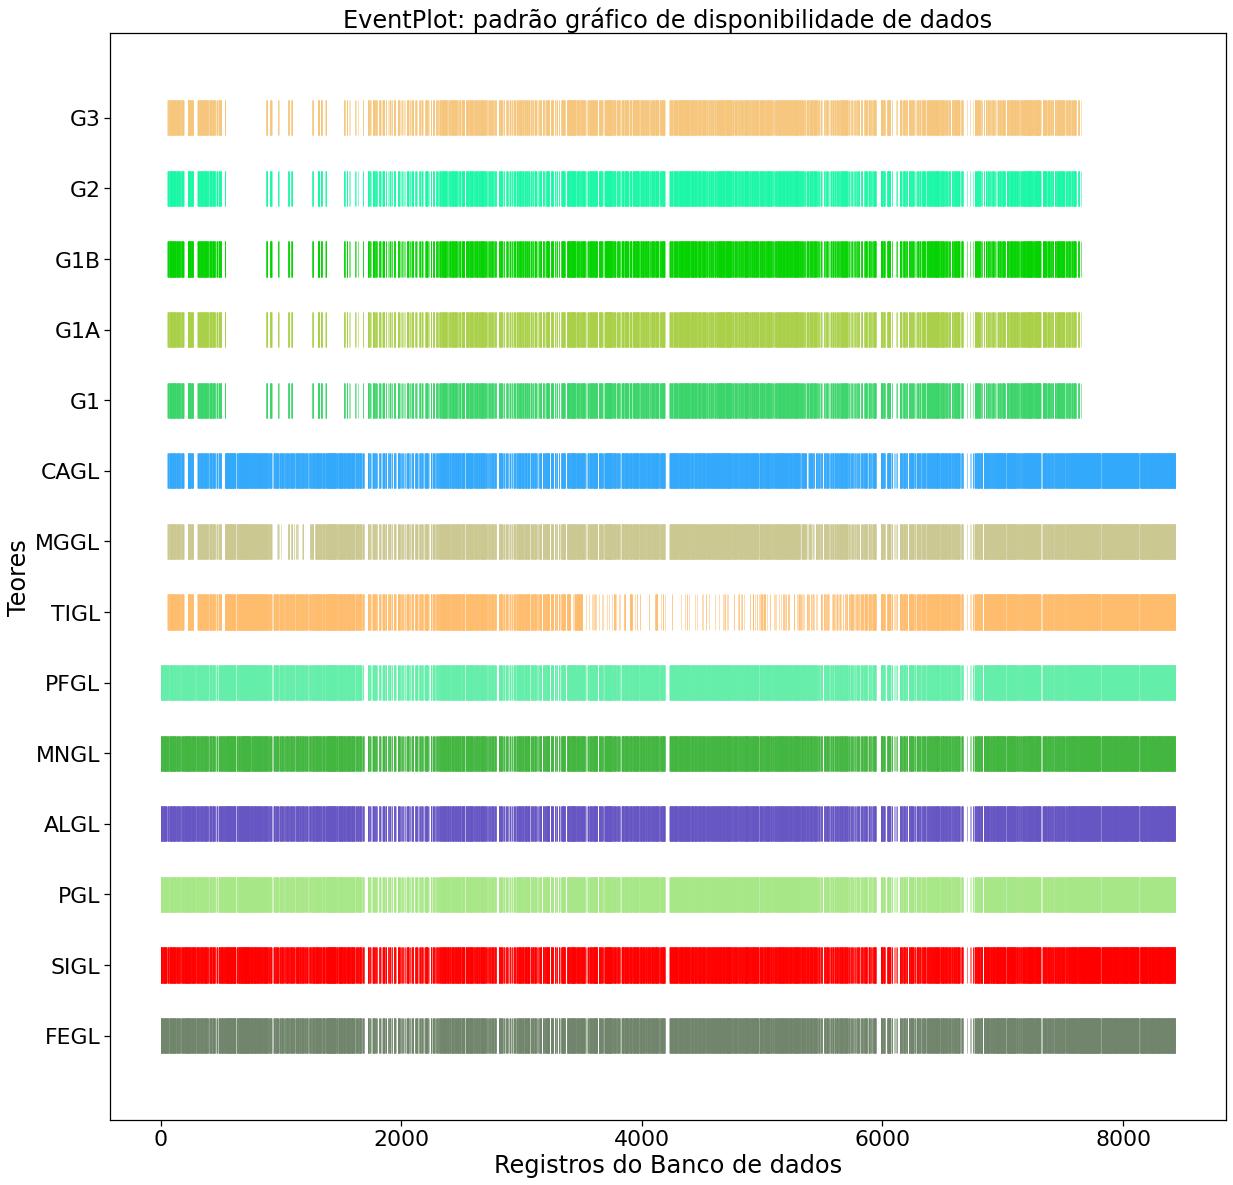

In [261]:
fig = plt.figure(figsize=(20,20))  # sets the window to 8 x 6 inches
valid = []
for t in param_event:
    valid.append(df_event.index[pd.notna(df_event[t])])

plt.eventplot(valid, color=mycolors, linelengths = 0.5, linewidth = 0.5)

plt.title('EventPlot: padrão gráfico de disponibilidade de dados')
plt.yticks(ticks, param_event)
plt.xlabel('Registros do Banco de dados')
plt.ylabel('Teores')
plt.show()

fig.savefig('eventplot_data_avaiable.jpeg', transparent=None)

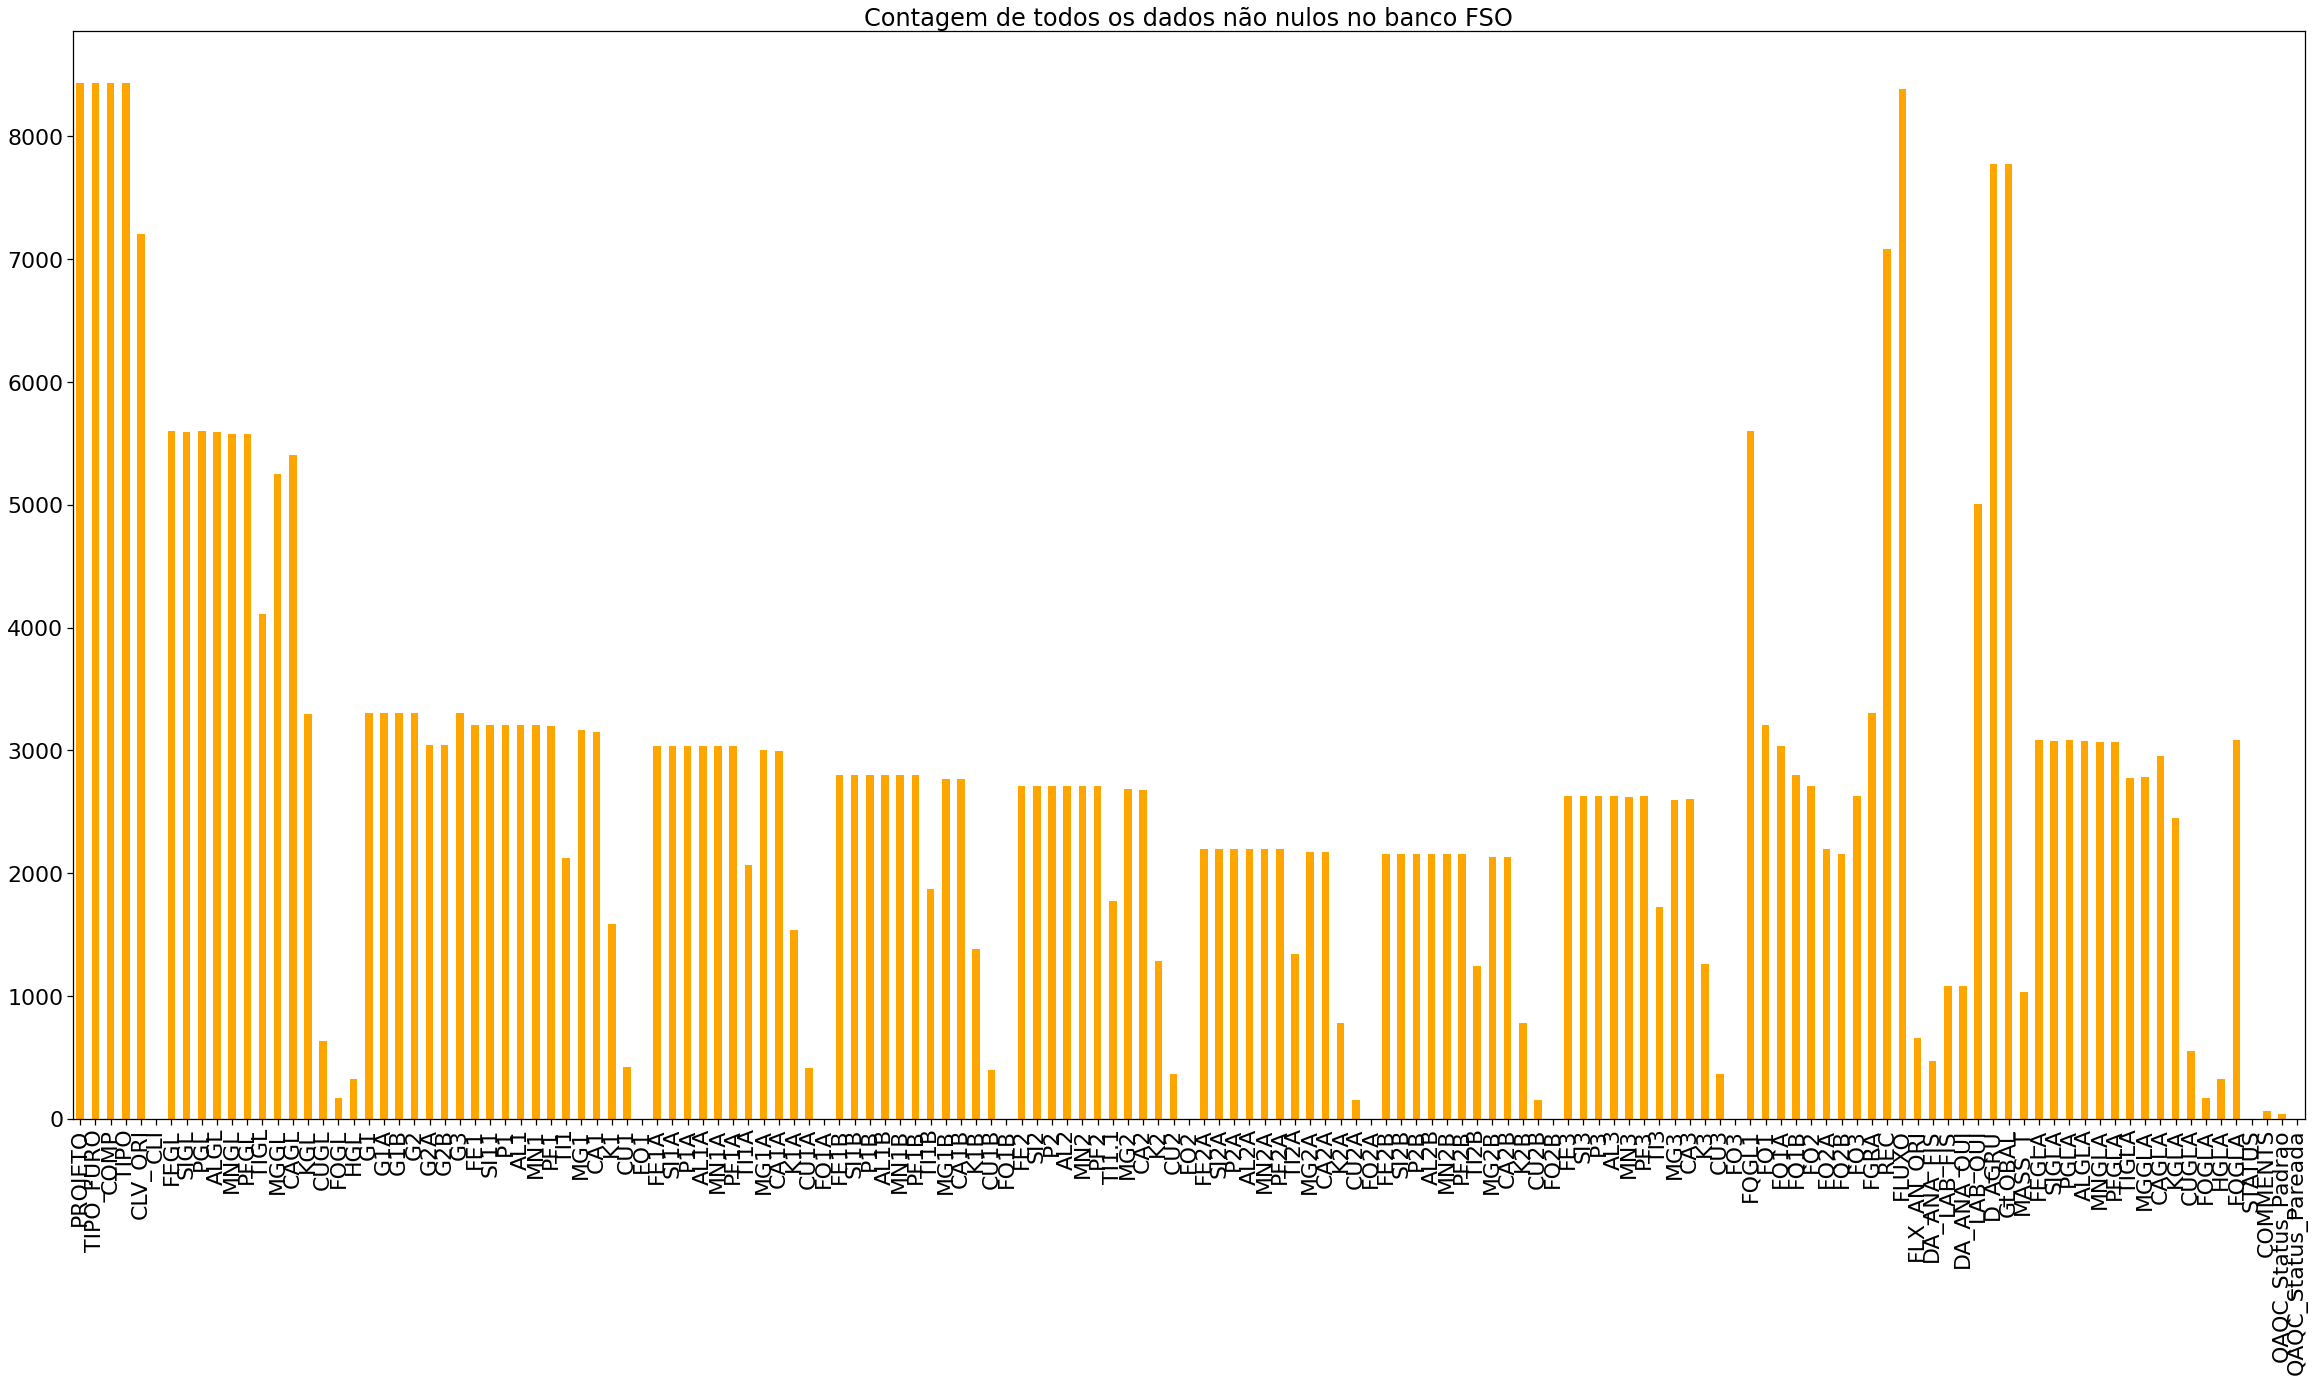

In [259]:
fig = plt.figure(figsize=(40,20)) 

plt.title('Contagem de todos os dados não nulos no banco FSO')
fso.loc[:, ~fso.columns.isin(not_countable)].count().plot.bar(color='orange')
fig.savefig('teores_total_counts.jpeg', transparent=None)

In [215]:
df_box = fso.loc[0:, 'CLV':'G3']

In [216]:
df_box2 = df_box[~df_box['CLV'].isin(['SR', 'NT', 'DT'])]

In [223]:
df_box3 = df_box[df_box['CLV'].isin(['CE','IC','IF', 'HF','HC', 'HD', 'JP'])]

In [224]:
df_box3.shape

(3592, 24)

In [225]:
df_box4 = df_box[df_box['CLI'].isin(['MS', 'MSD', 'QT'])]

In [234]:
litocolor=dict(AT= "#777777",CE= "#00AA00",HC = "#EE0000",HF = "#EE00DD",IAL = "#77AAFF",JP = "#004488",IC = "#004488", \
               IF = "#0088FF",IGO = "#7766DD", IMN = "#660099",IMNF = "#000000",IN = "#774400")

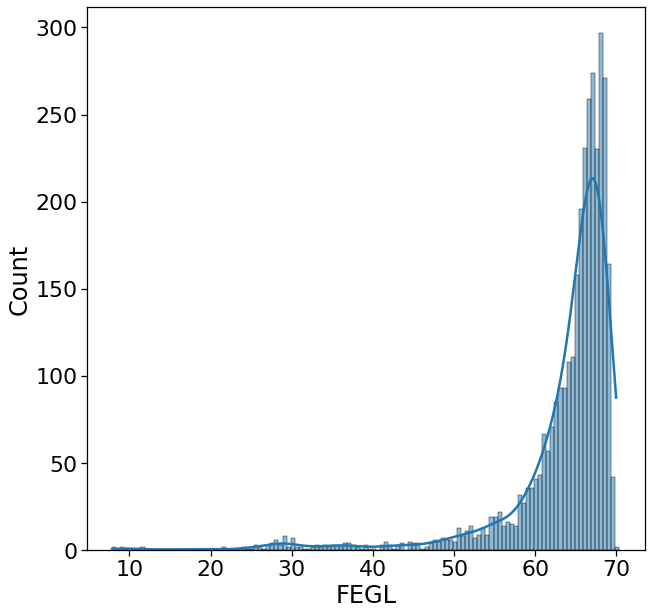

In [235]:
fig, ax = plt.subplots(figsize=chart_size)
sea.histplot(data=df_box3["FEGL"],binwidth=0.5,kde=True)
plt.show()

In [3]:
fig, ax = plt.subplots(figsize=chart_size)
sea.distplot(x=df_box3["FEGL"],kde=True,rug=True, hist=False)
plt.show()

NameError: name 'chart_size' is not defined

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


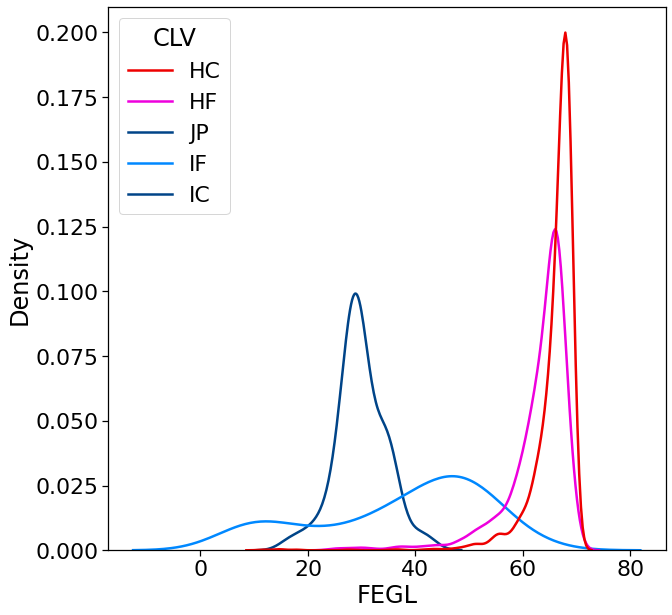

In [237]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_box3,x="FEGL",hue="CLV", common_norm=False, palette=litocolor, alpha=.5)
fig.savefig('SL1_FEGL.jpeg', transparent=None)
plt.show()

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


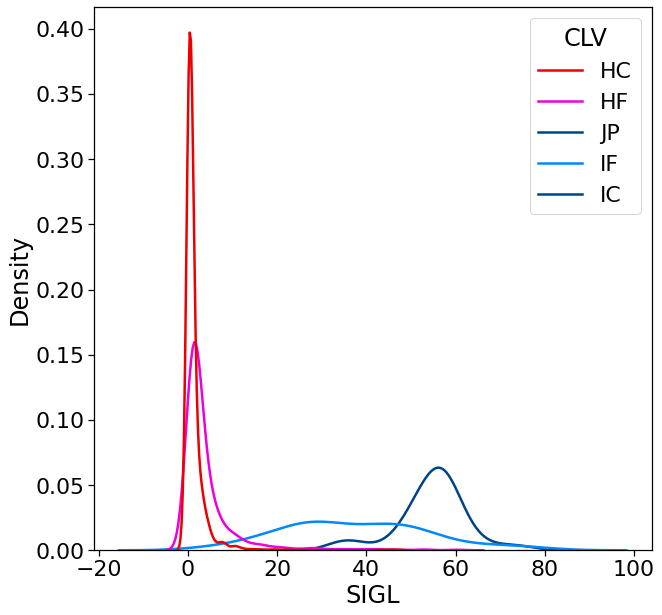

In [240]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_box3,x="SIGL",hue="CLV", common_norm=False, palette=litocolor, alpha=.5)
fig.savefig('SL1_SIGL.jpeg', transparent=None)
plt.show()

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


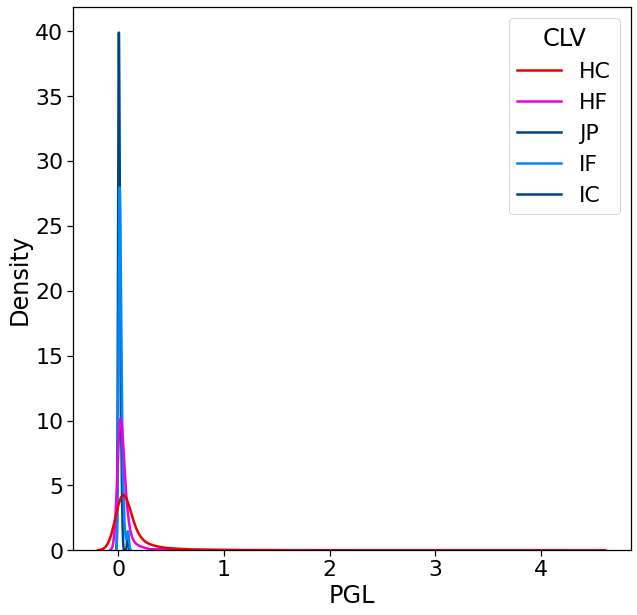

In [241]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_box3,x="PGL",hue="CLV", common_norm=False, palette=litocolor, alpha=.5)
fig.savefig('SL1_PGL.jpeg', transparent=None)
plt.show()

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


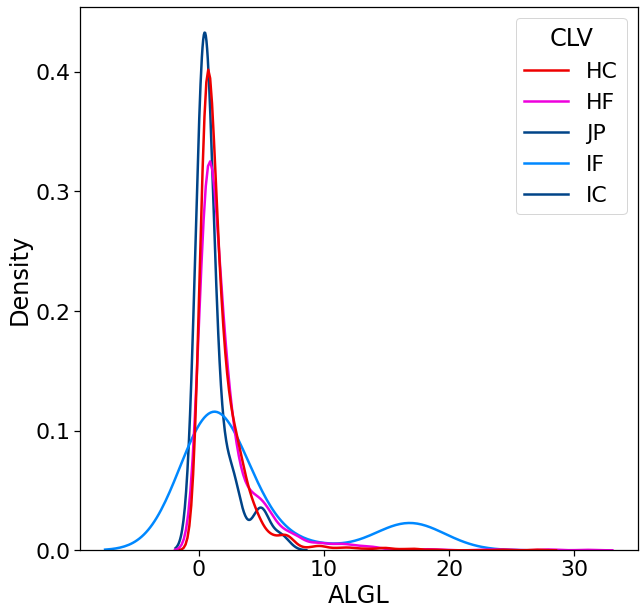

In [242]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_box3,x="ALGL",hue="CLV", common_norm=False, palette=litocolor, alpha=.5)
fig.savefig('SL1_ALGL.jpeg', transparent=None)
plt.show()

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


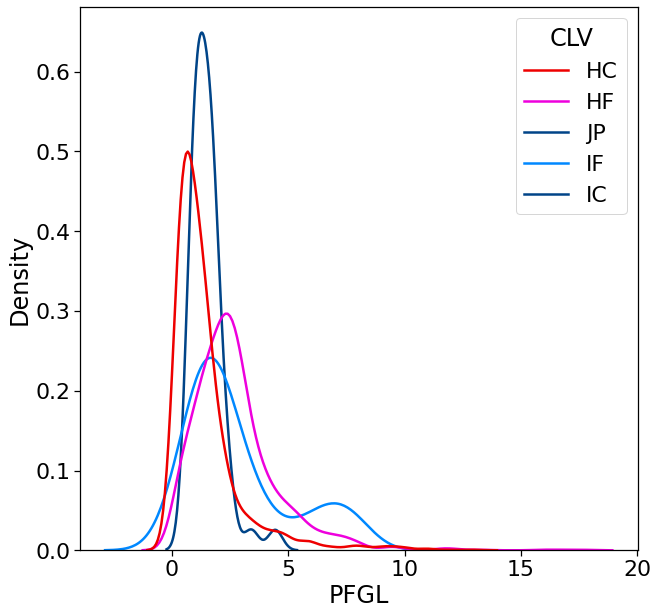

In [243]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_box3,x="PFGL",hue="CLV", common_norm=False, palette=litocolor, alpha=.5)
fig.savefig('SL1_PFGL.jpeg', transparent=None)
plt.show()

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


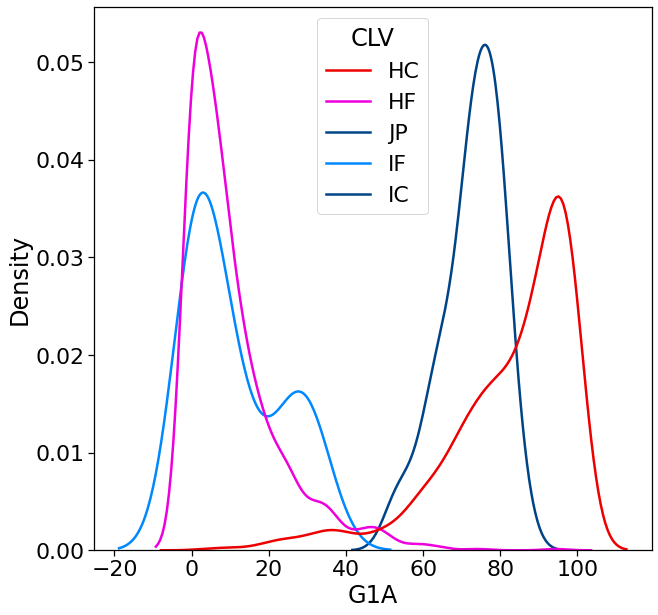

In [246]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_box3,x="G1A",hue="CLV", common_norm=False, palette=litocolor, alpha=.5)
fig.savefig('SL1_G1A.jpeg', transparent=None)
plt.show()

In [253]:
DF_QUERY=df_box3[df_box3['CLV']<0]

In [255]:
DF_QUERY.shape

(0, 24)

## Creating Boxplots for all Rocks:

In [155]:
fig = plt.pyplot.figure(figsize=(40,20)) 
feglbox = sea.boxplot(x="CLI", y="FEGL", data=df_box2)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_fegl.jpeg', transparent=None)

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

## Ore Boxplots

## Fegl

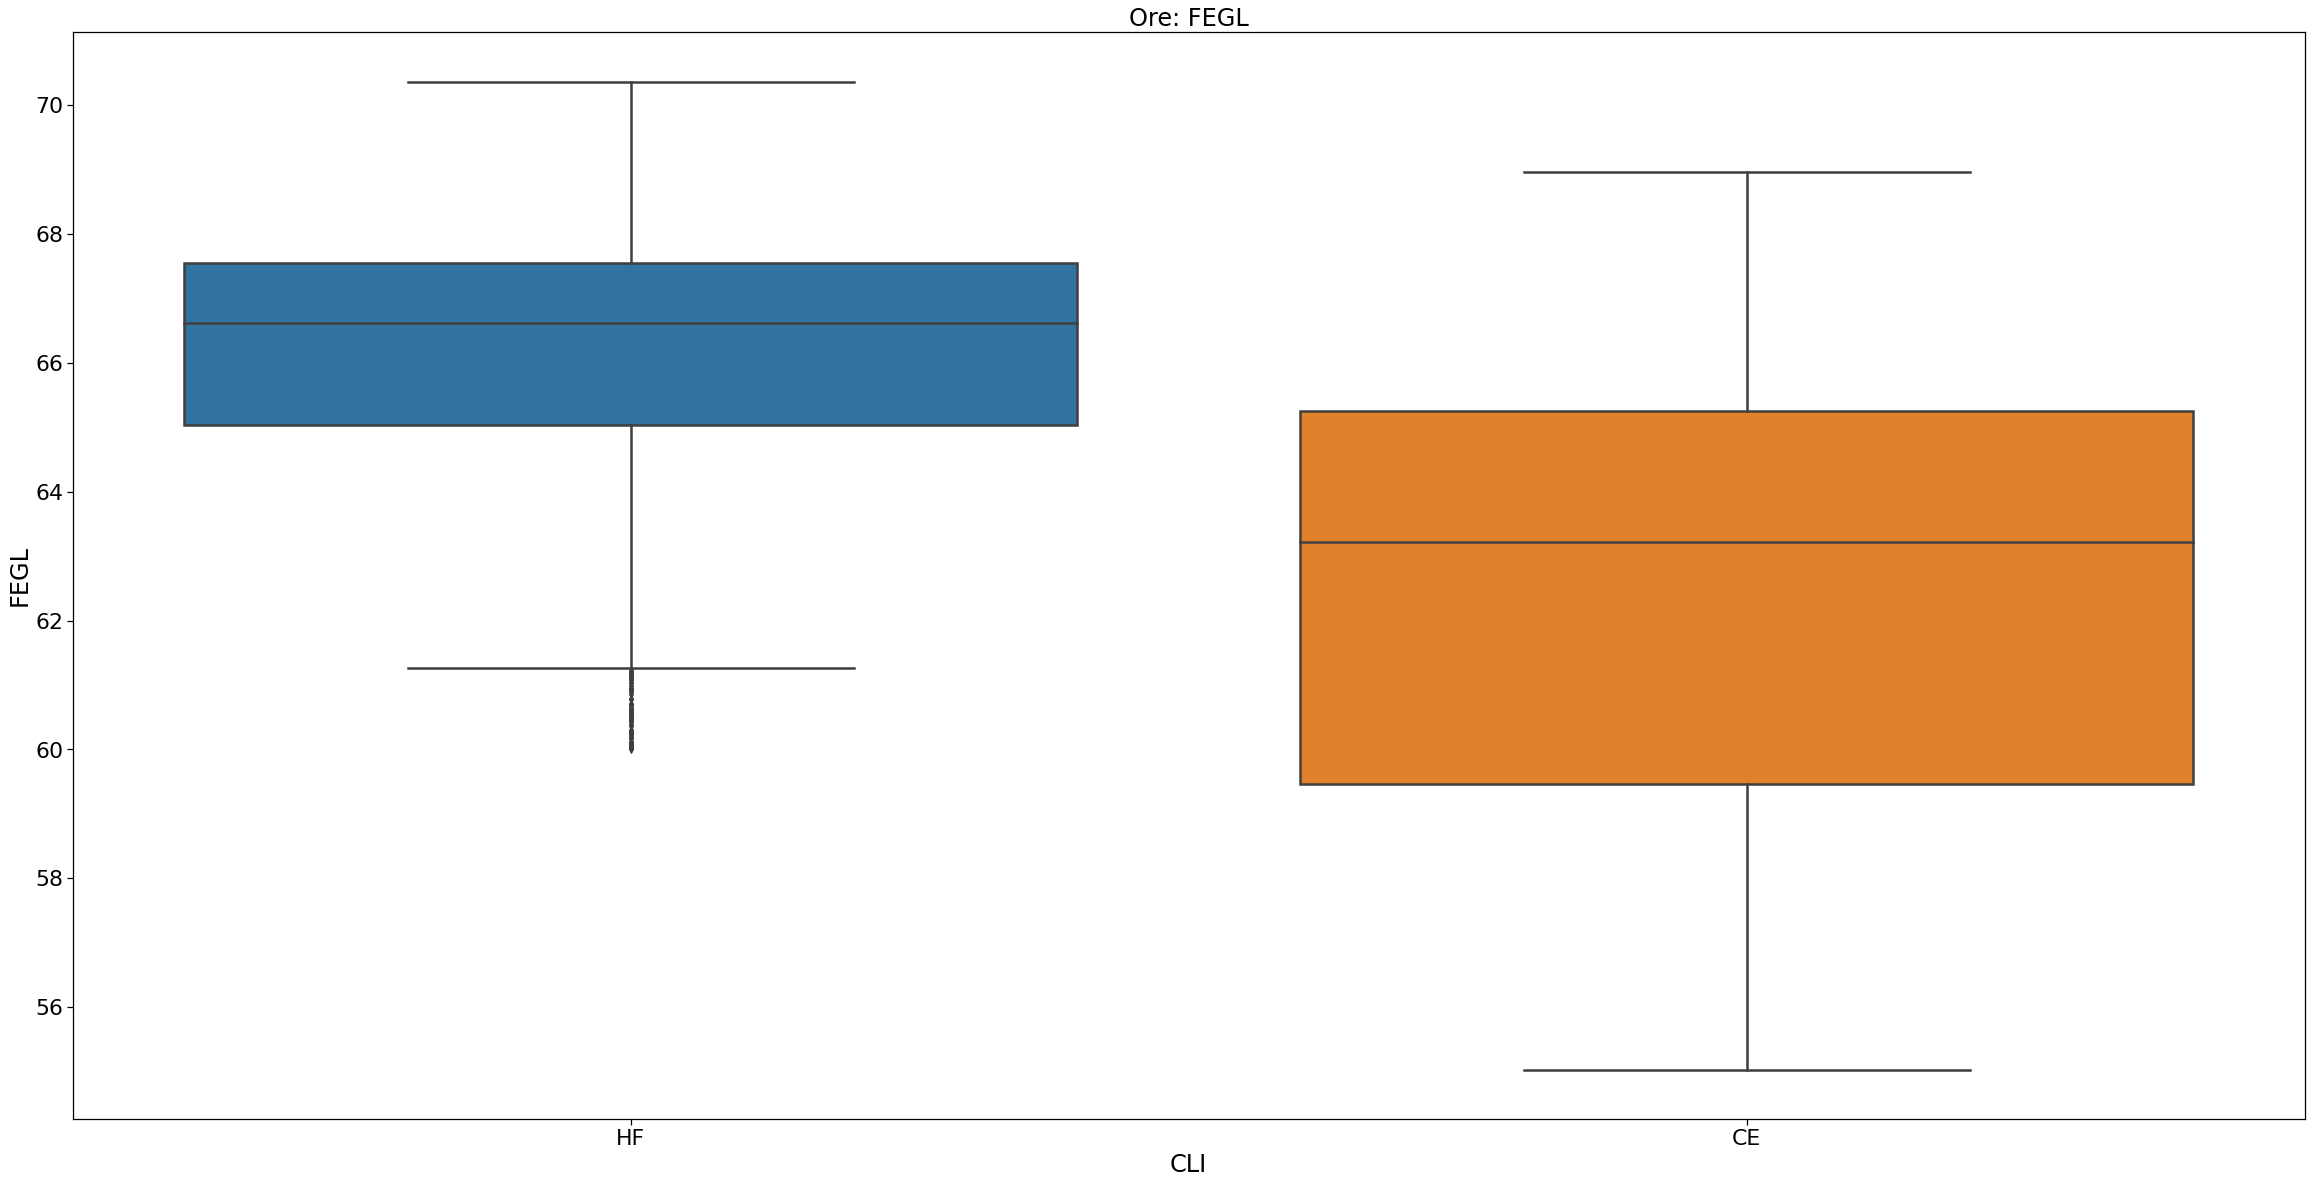

In [111]:
fig = plt.figure(figsize=(40,20)) 
gr = 'FEGL'
feglbox = sea.boxplot(x="CLI", y=gr, data=df_box3)
feglbox.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

##### We missed the opportunity to better evaluate and manage our blends by omitting and diluting the compact itabirite above 50% Fegl. The blue sea down dip is the rabbit hole.

## Sigl

In [112]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'sigl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

## Pgl

In [113]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'pgl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

##### Before modeling, check if some extreme pgl values ​​are close to intrusive bodies (hydrothermal contribution?)

In [114]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'pgl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
#setting yaxis to emphasize the box
box.set(ylim=(0, 0.5))
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'_cl.jpeg', transparent=None)

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

## Algl

In [115]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'algl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

## Mngl

In [58]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mngl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

ValueError: Could not interpret input 'cli'

<Figure size 2880x1440 with 0 Axes>

##### In some situations, the FMN shows manganese grades compatible with the Mn ores in our operations. If these bodies are regionalized and define modelable space, it doesn't take much volume to be compatible with the annual production of Mn. Base for comparison: 3Mwt / year @ 30% Mngl (CKS ROM)

##### Some samples can be located close to chemical traps (high PH + reductive/oxidative water levels), or even litostructural traps (dykes and other barriers)

## Pfgl

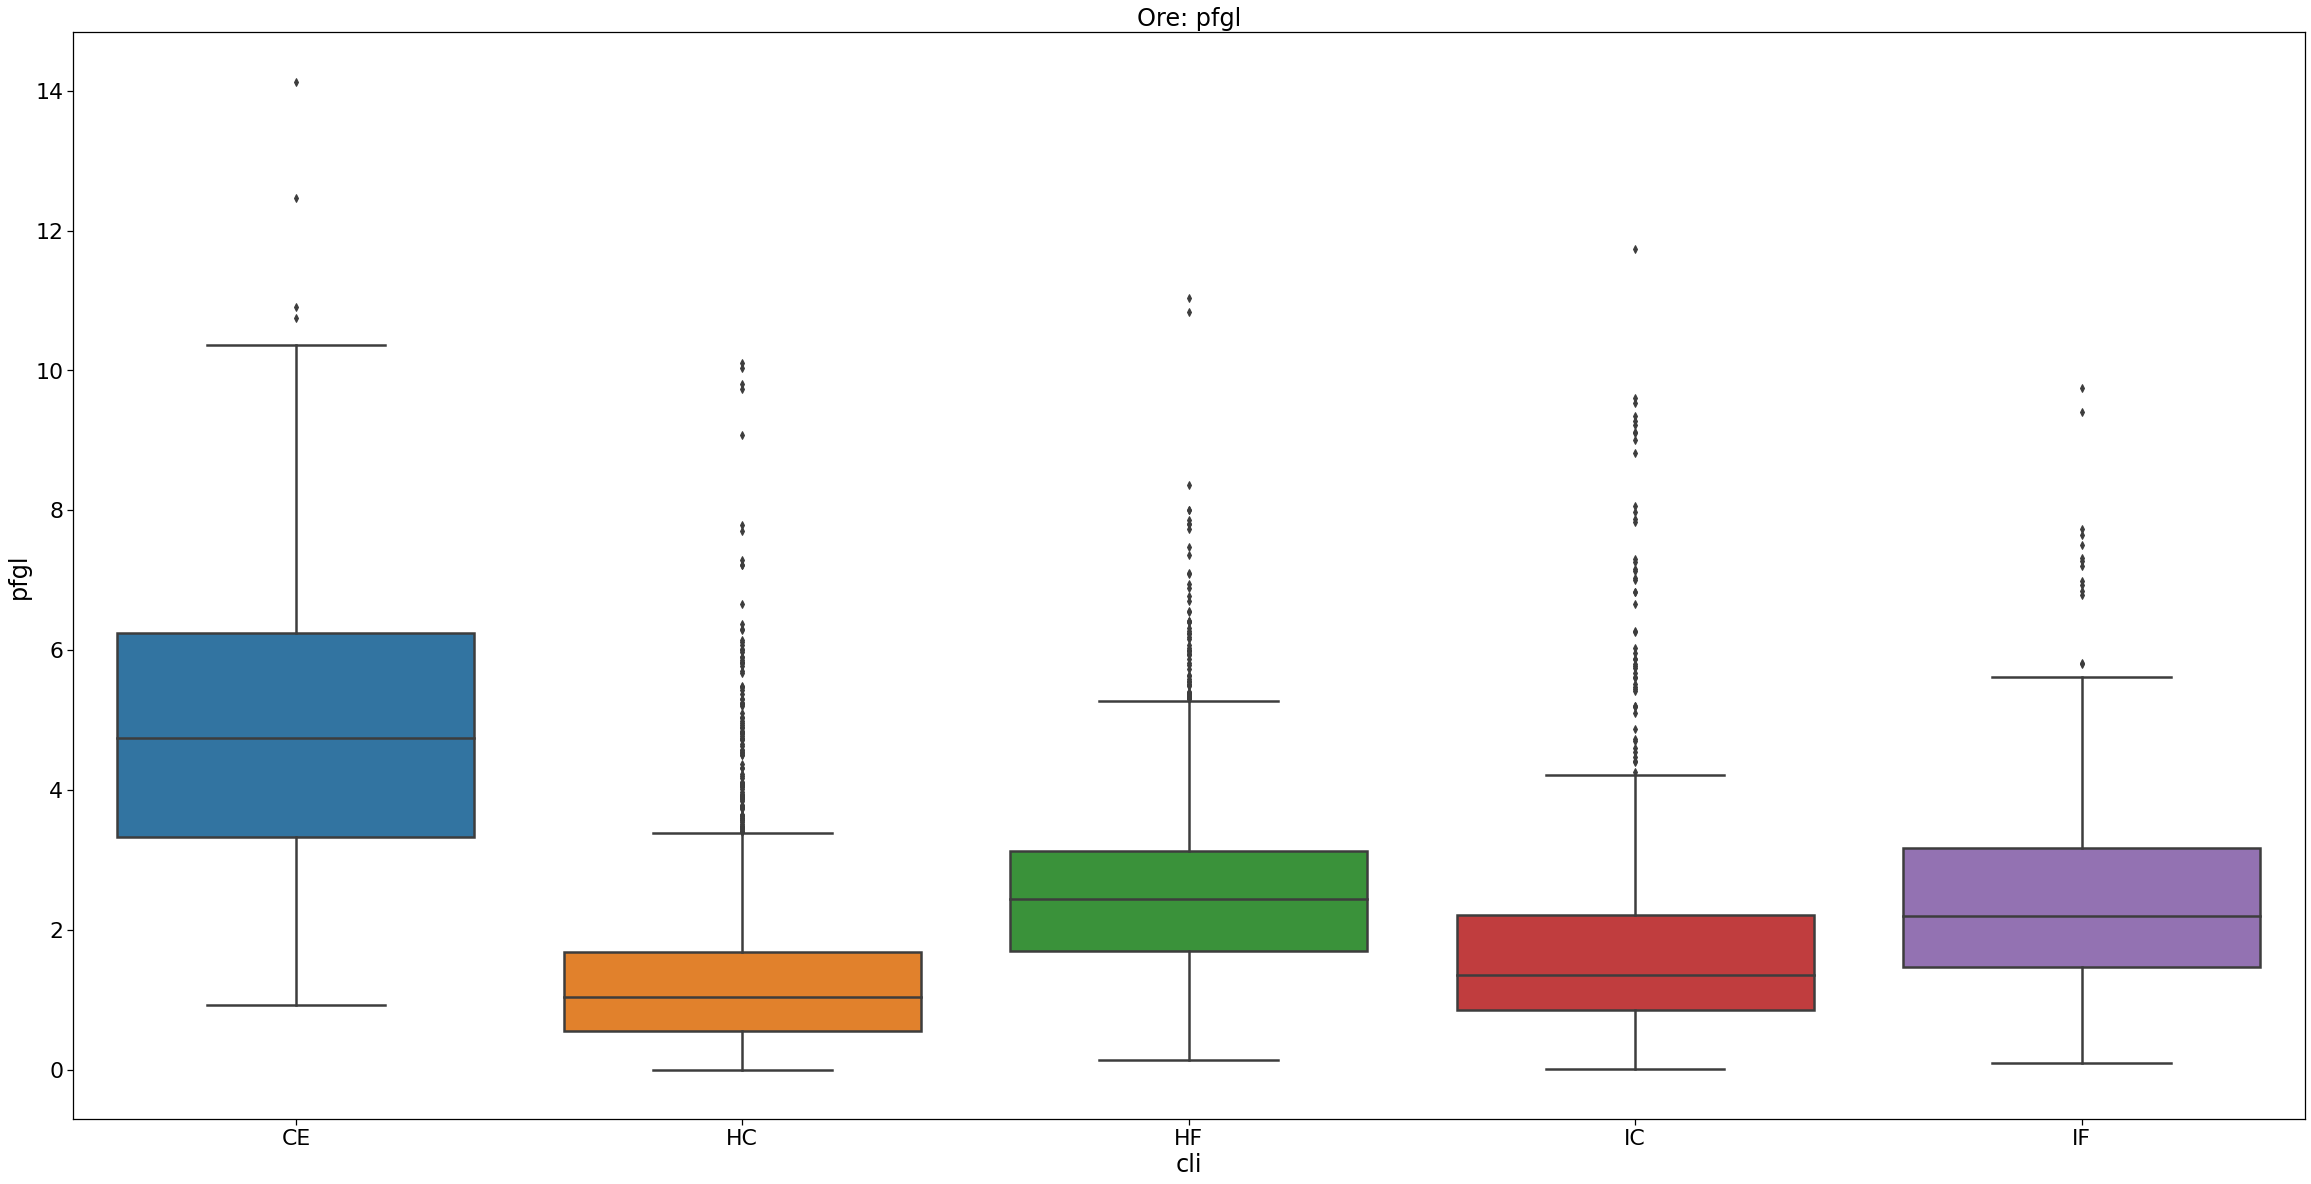

In [74]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'pfgl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)


## Tigl

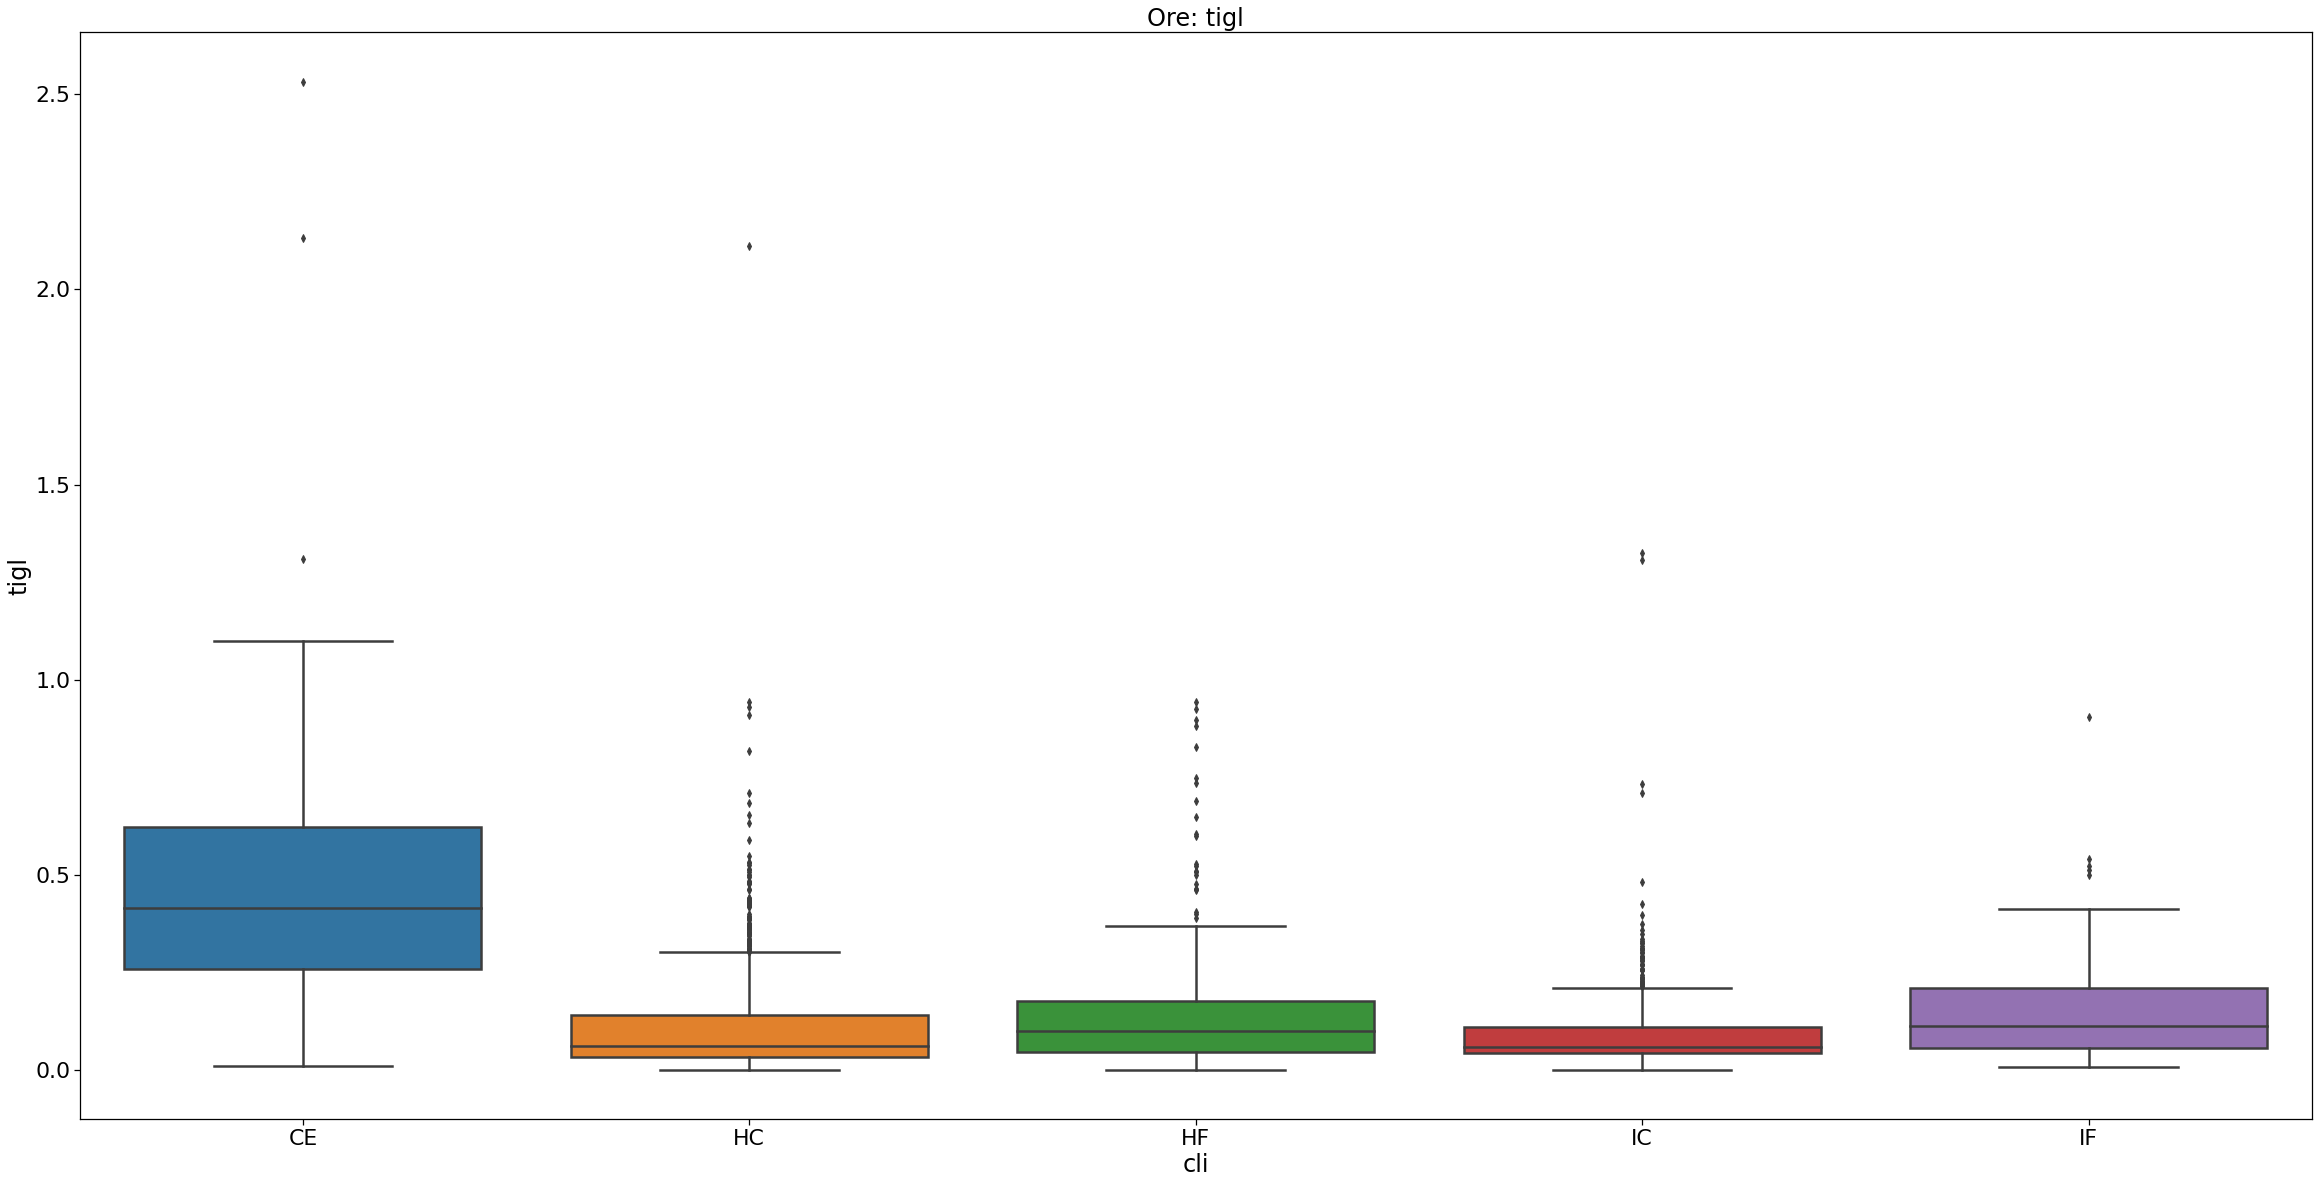

In [75]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'tigl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

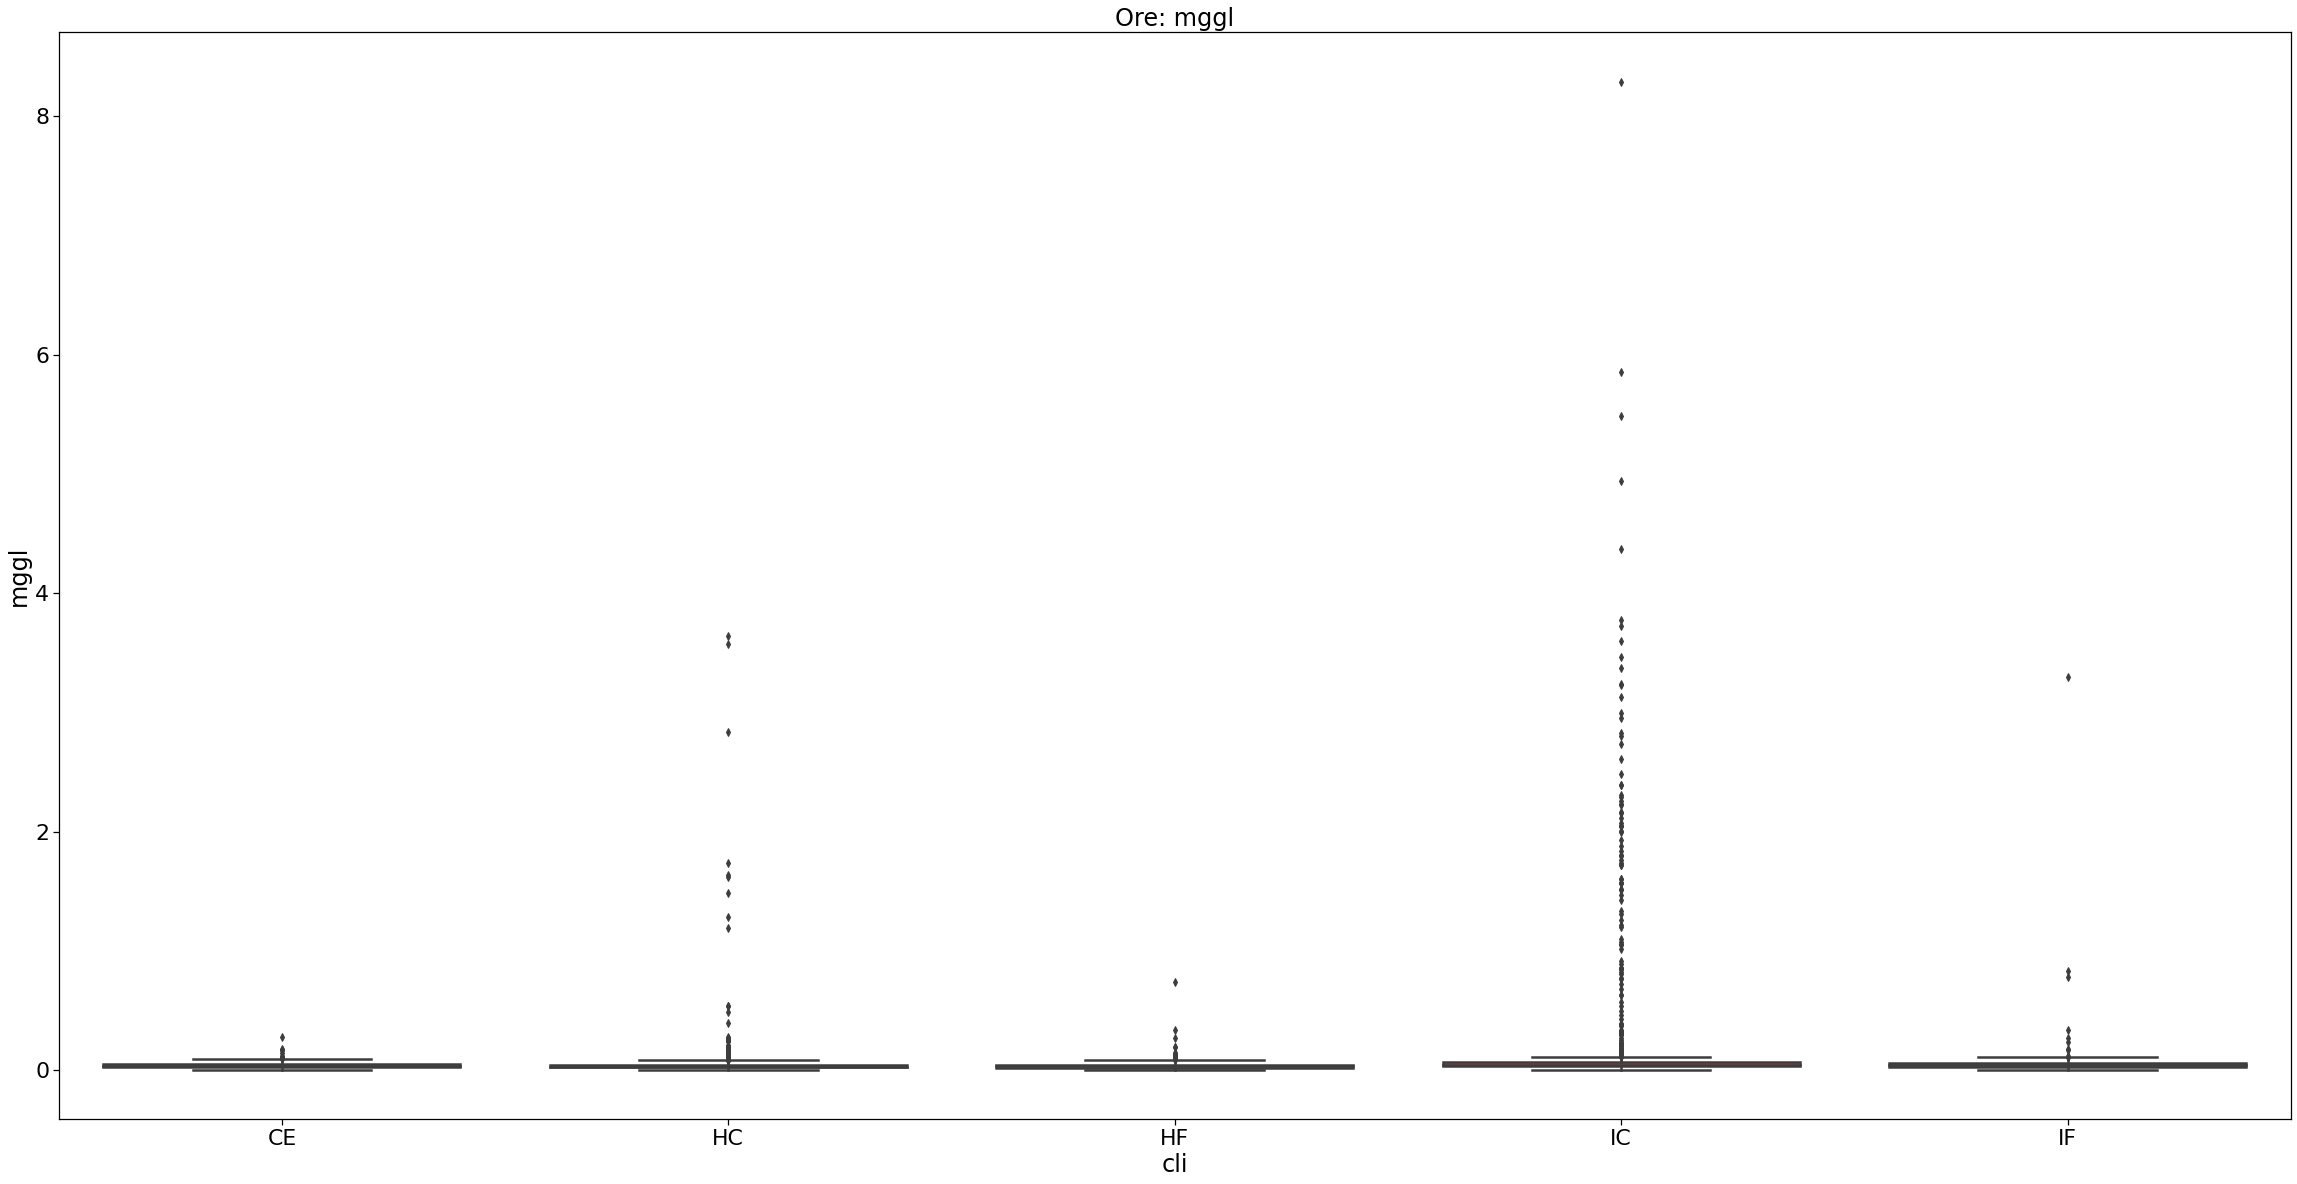

In [76]:
df_ti = df_box[df_box['cli'].isin(['AG','FL', 'IN', 'DO', 'IGO'])]

fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mggl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## Mggl

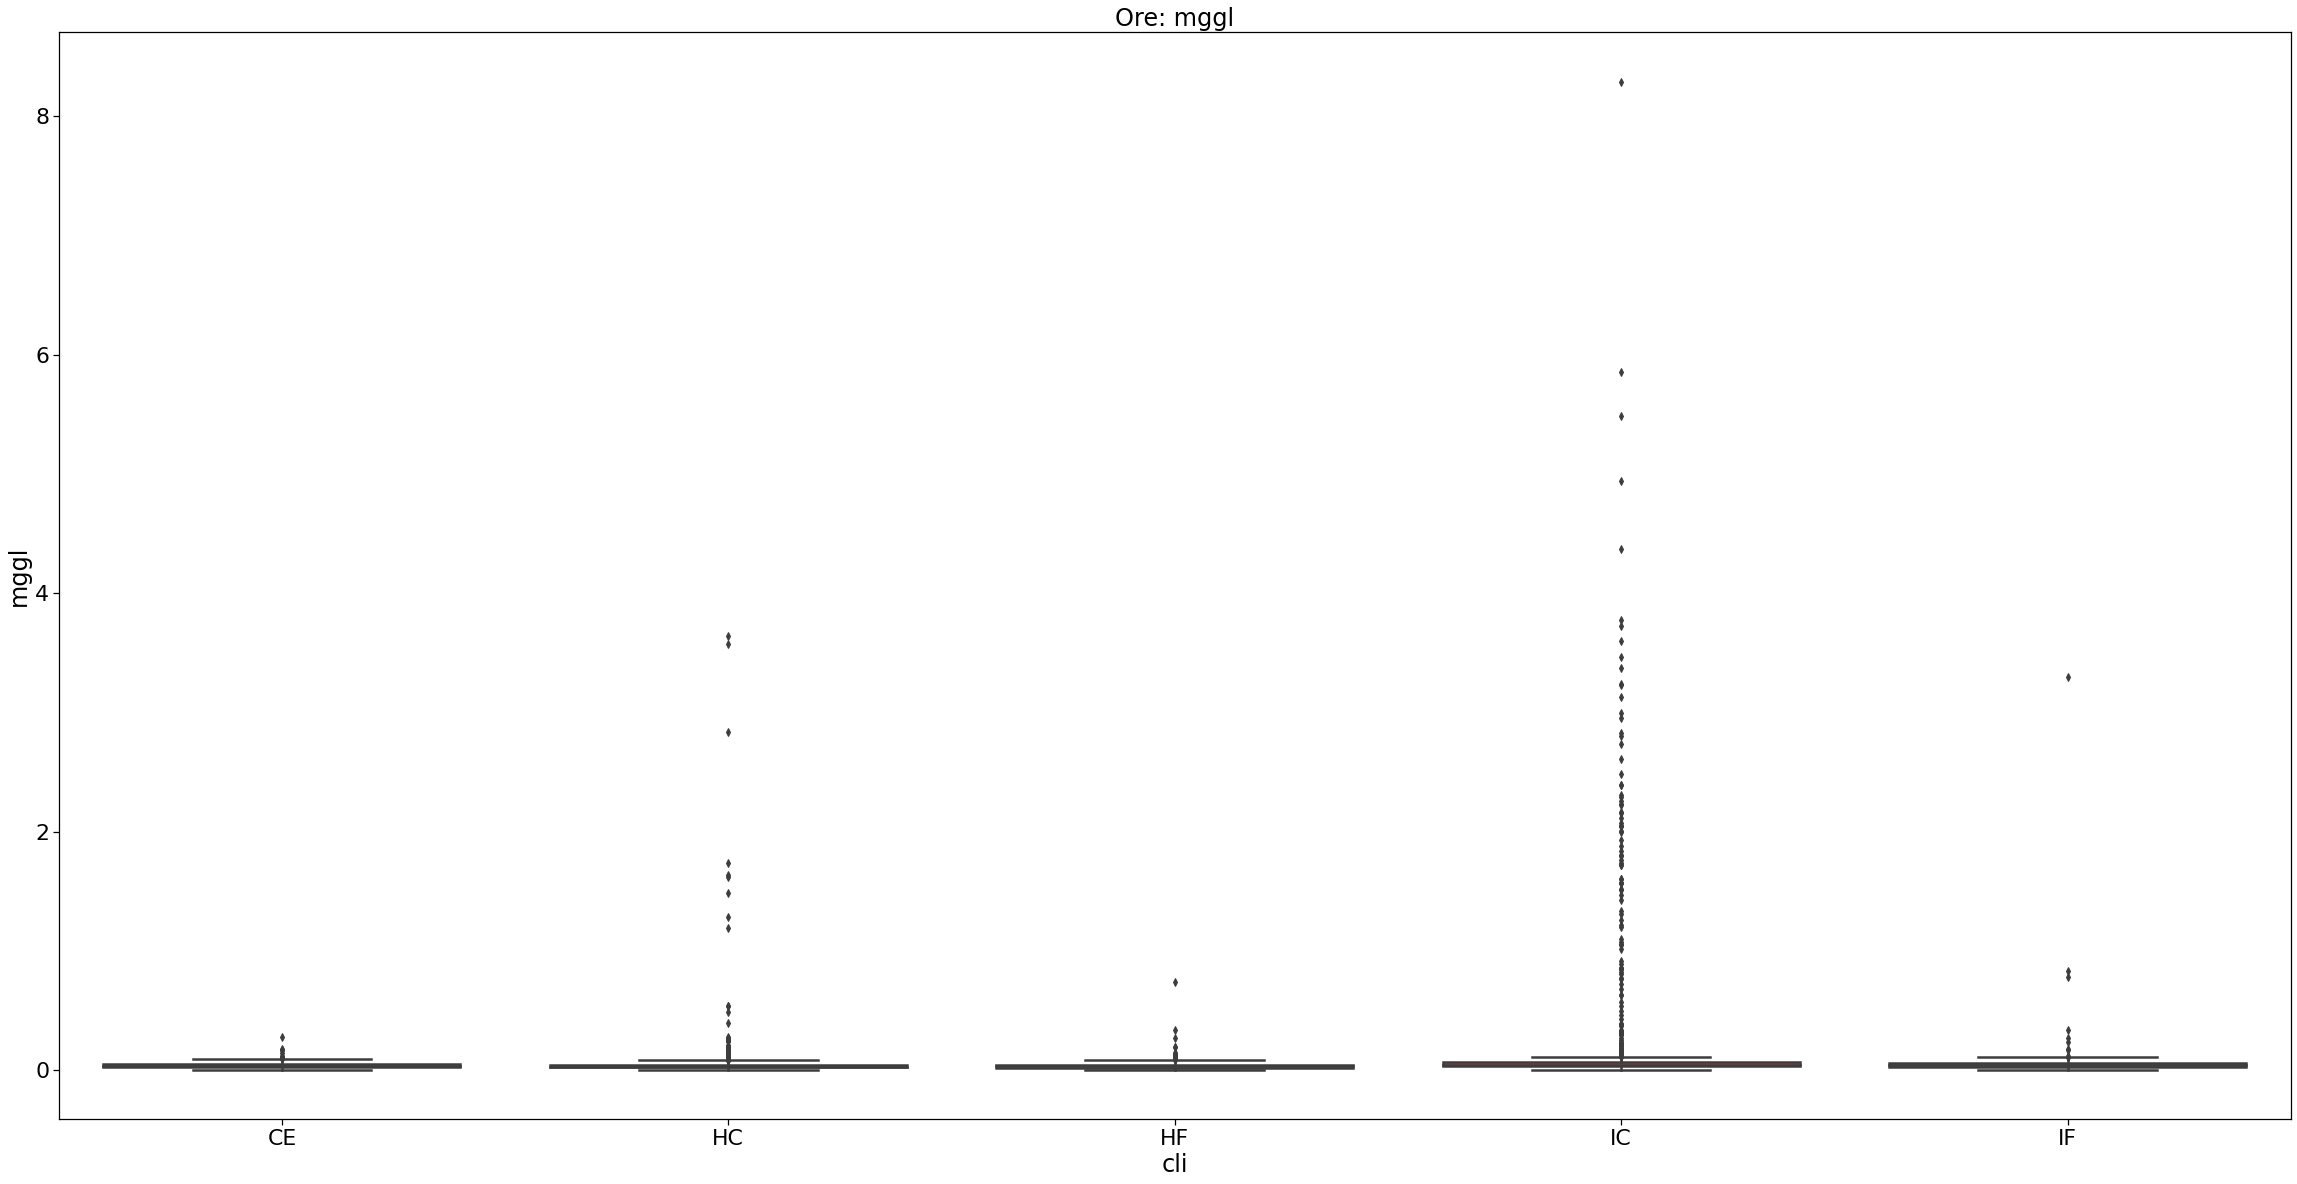

In [77]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mggl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## Cagl

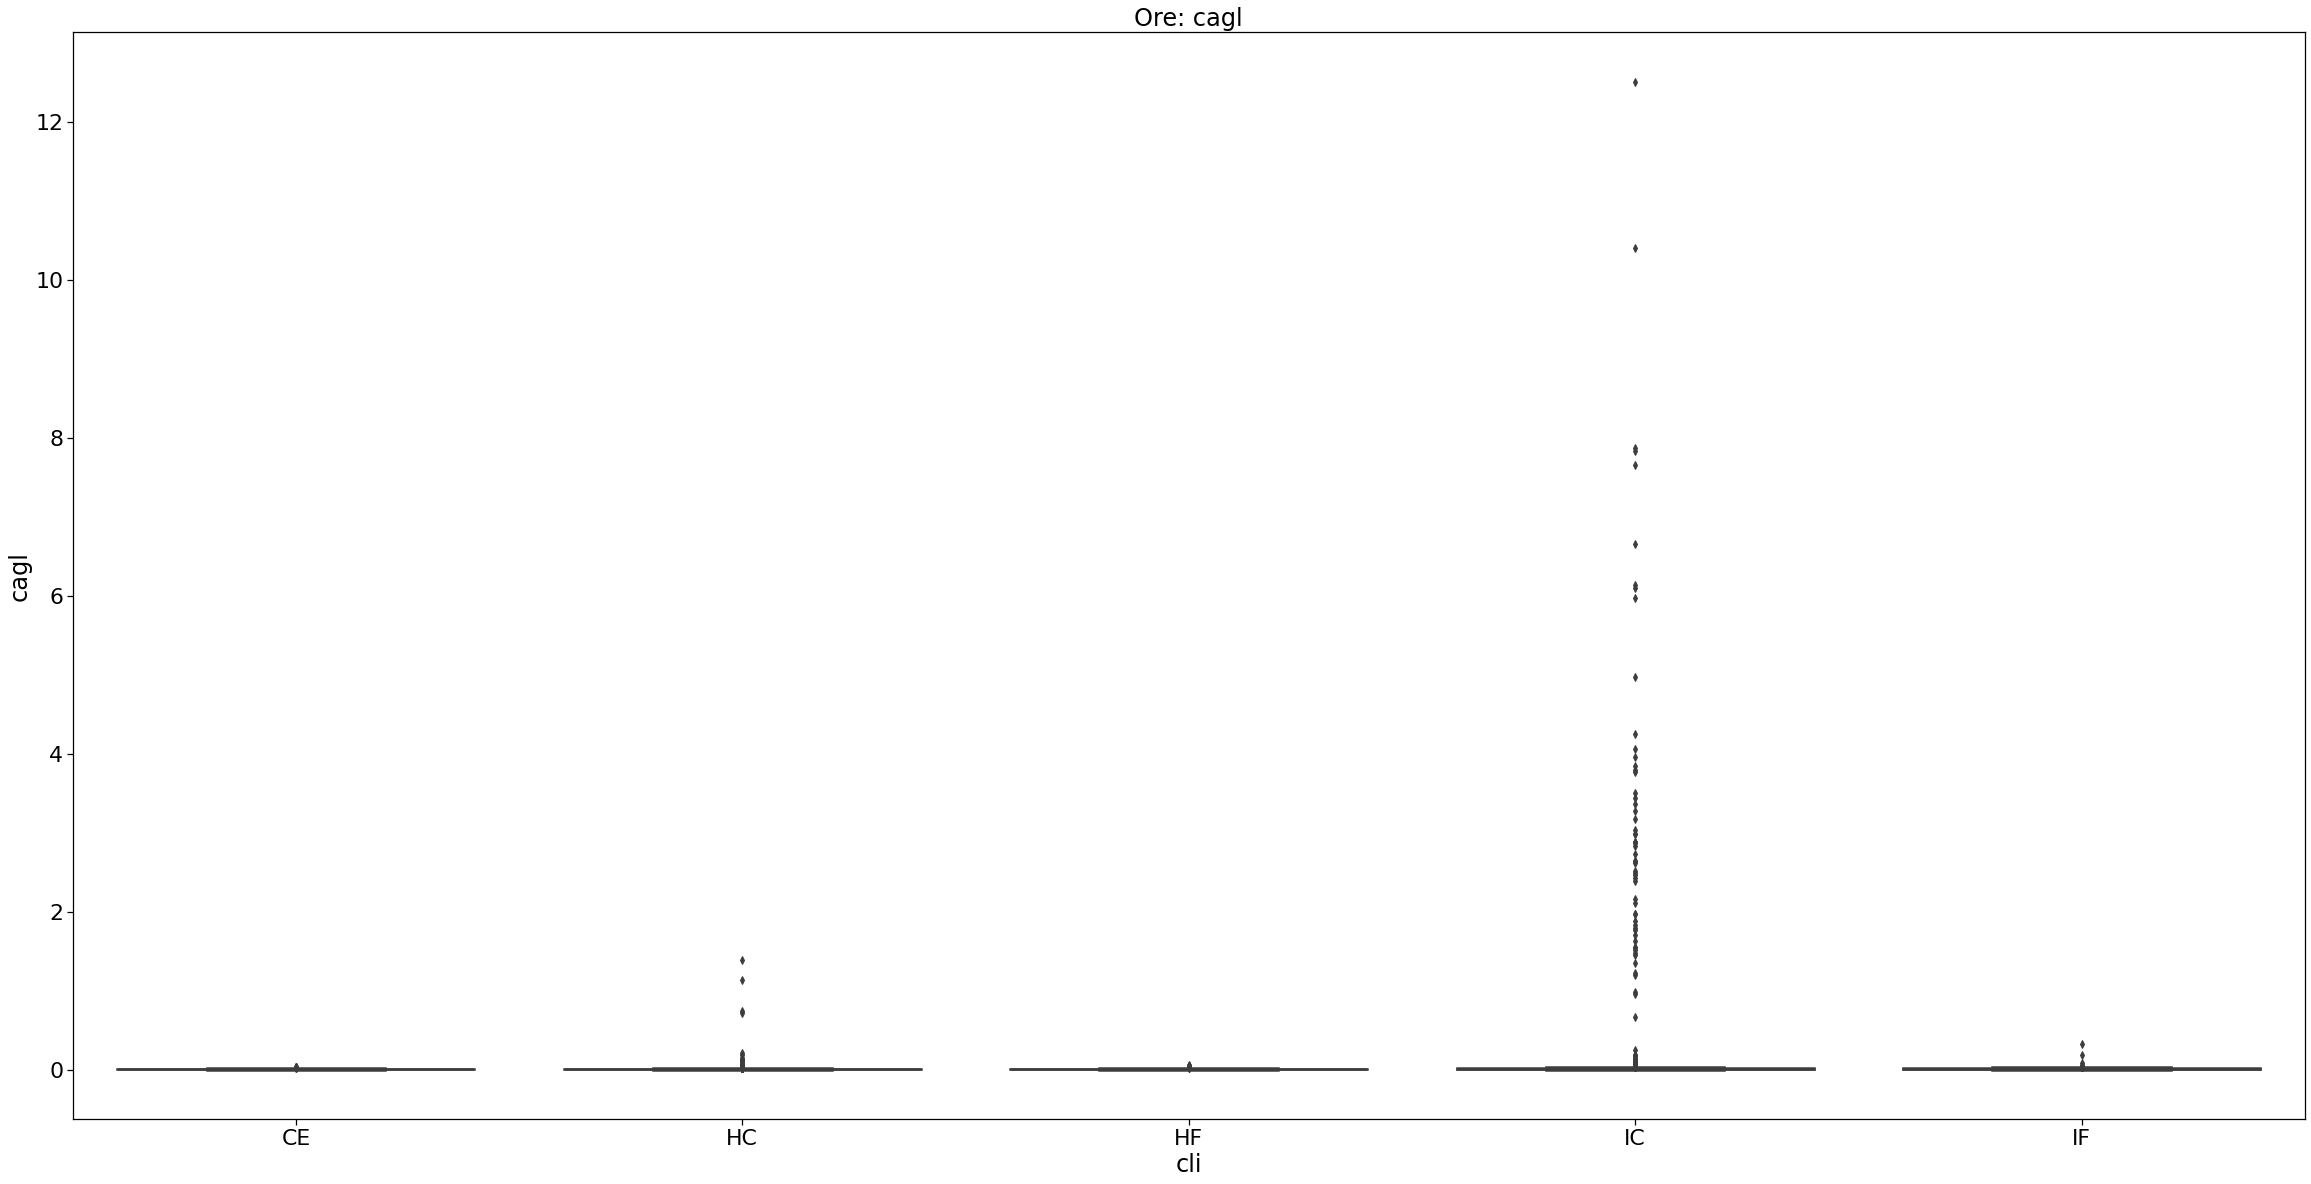

In [78]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'cagl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## G1a

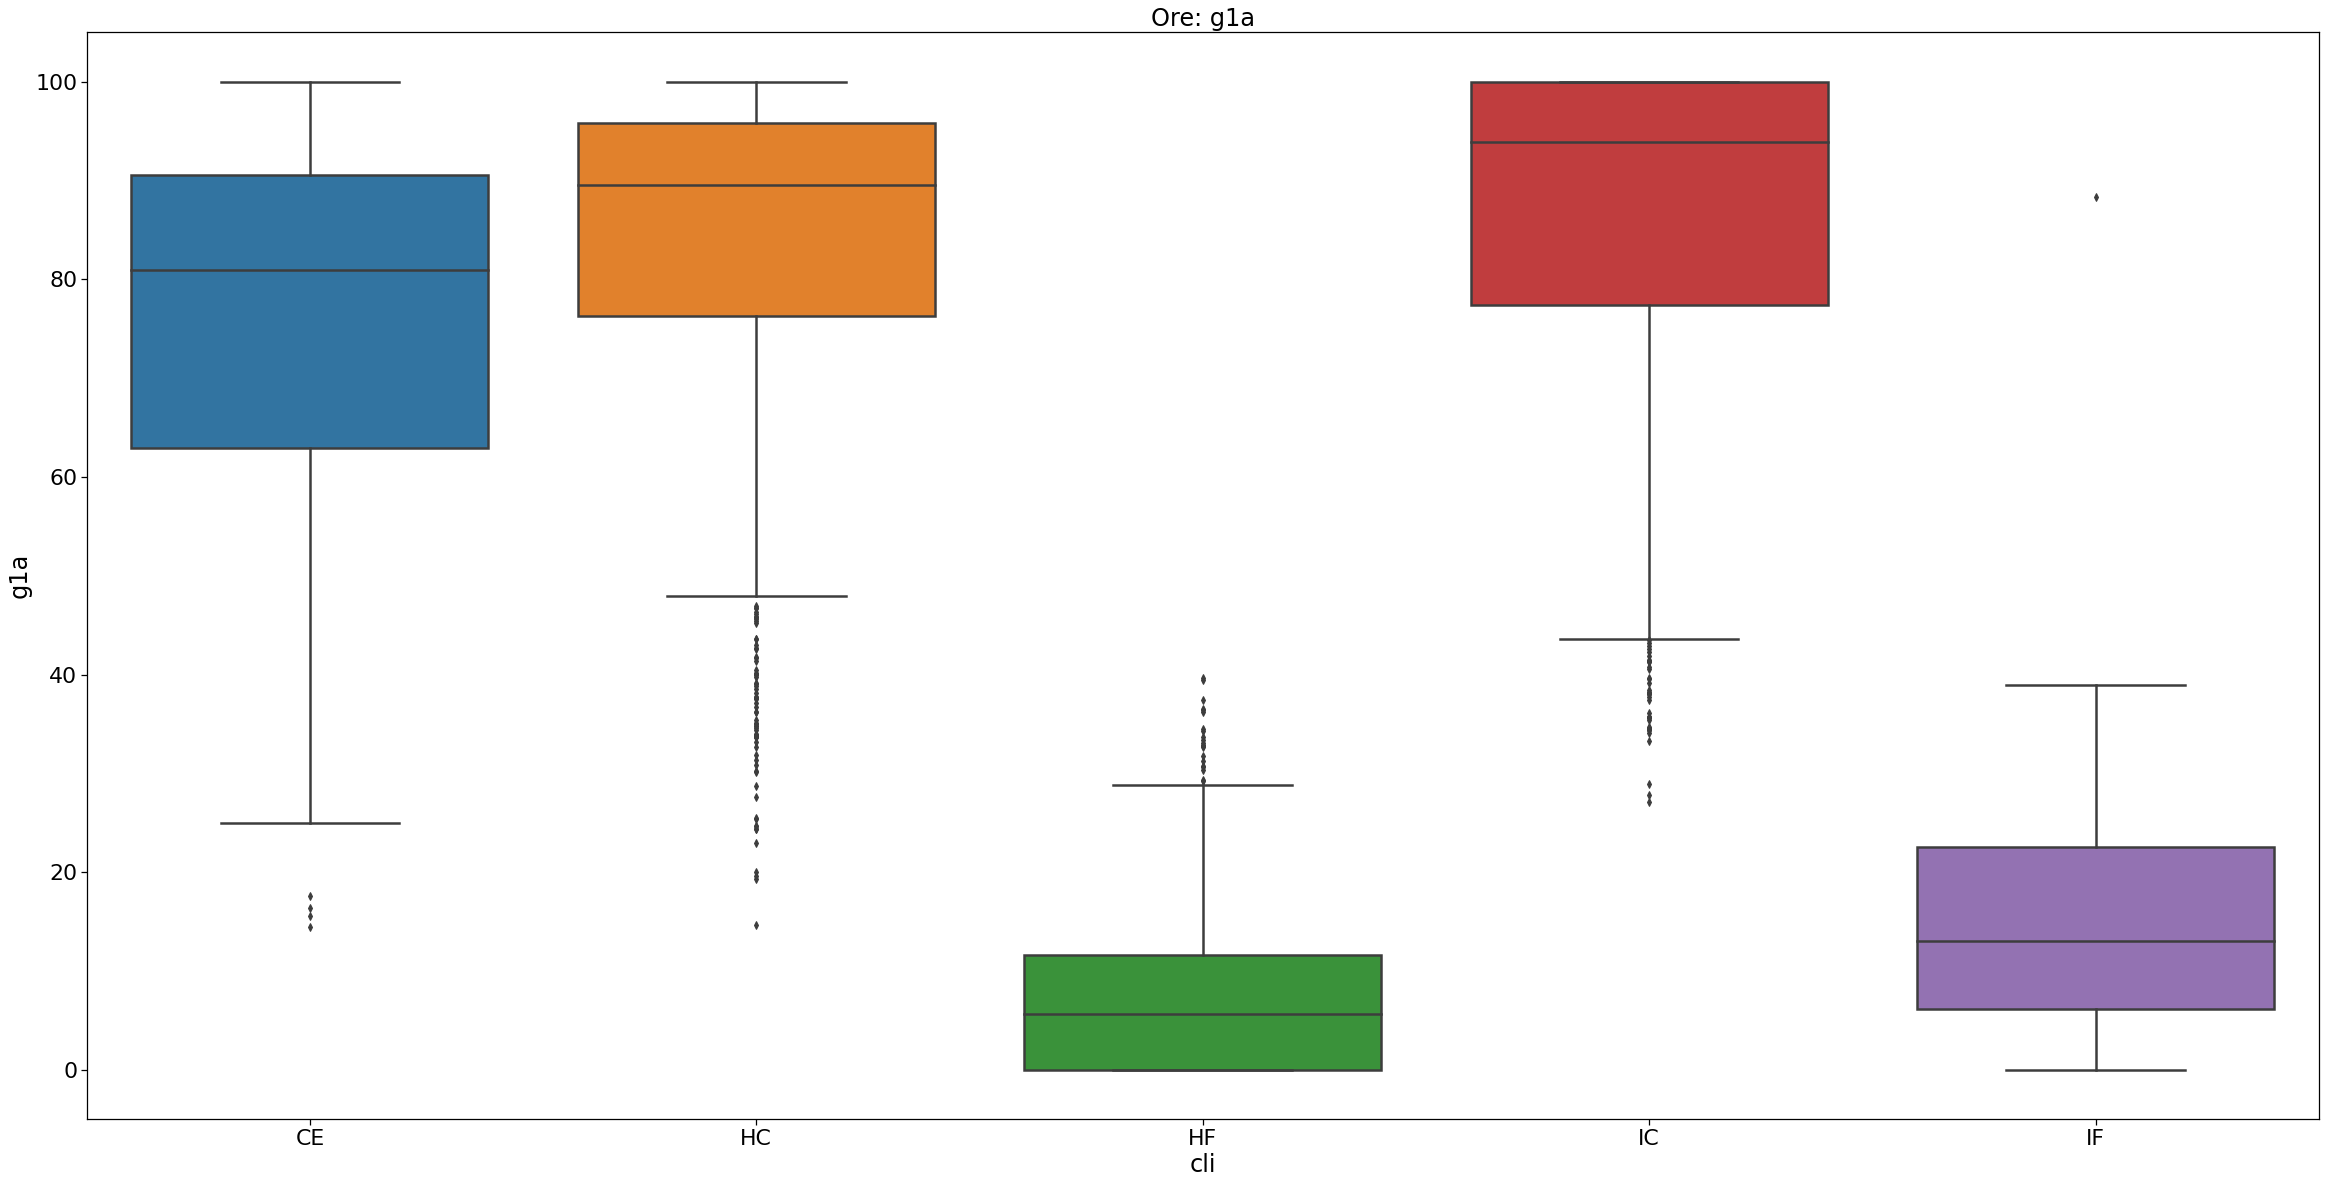

In [79]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'g1a'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## G1b

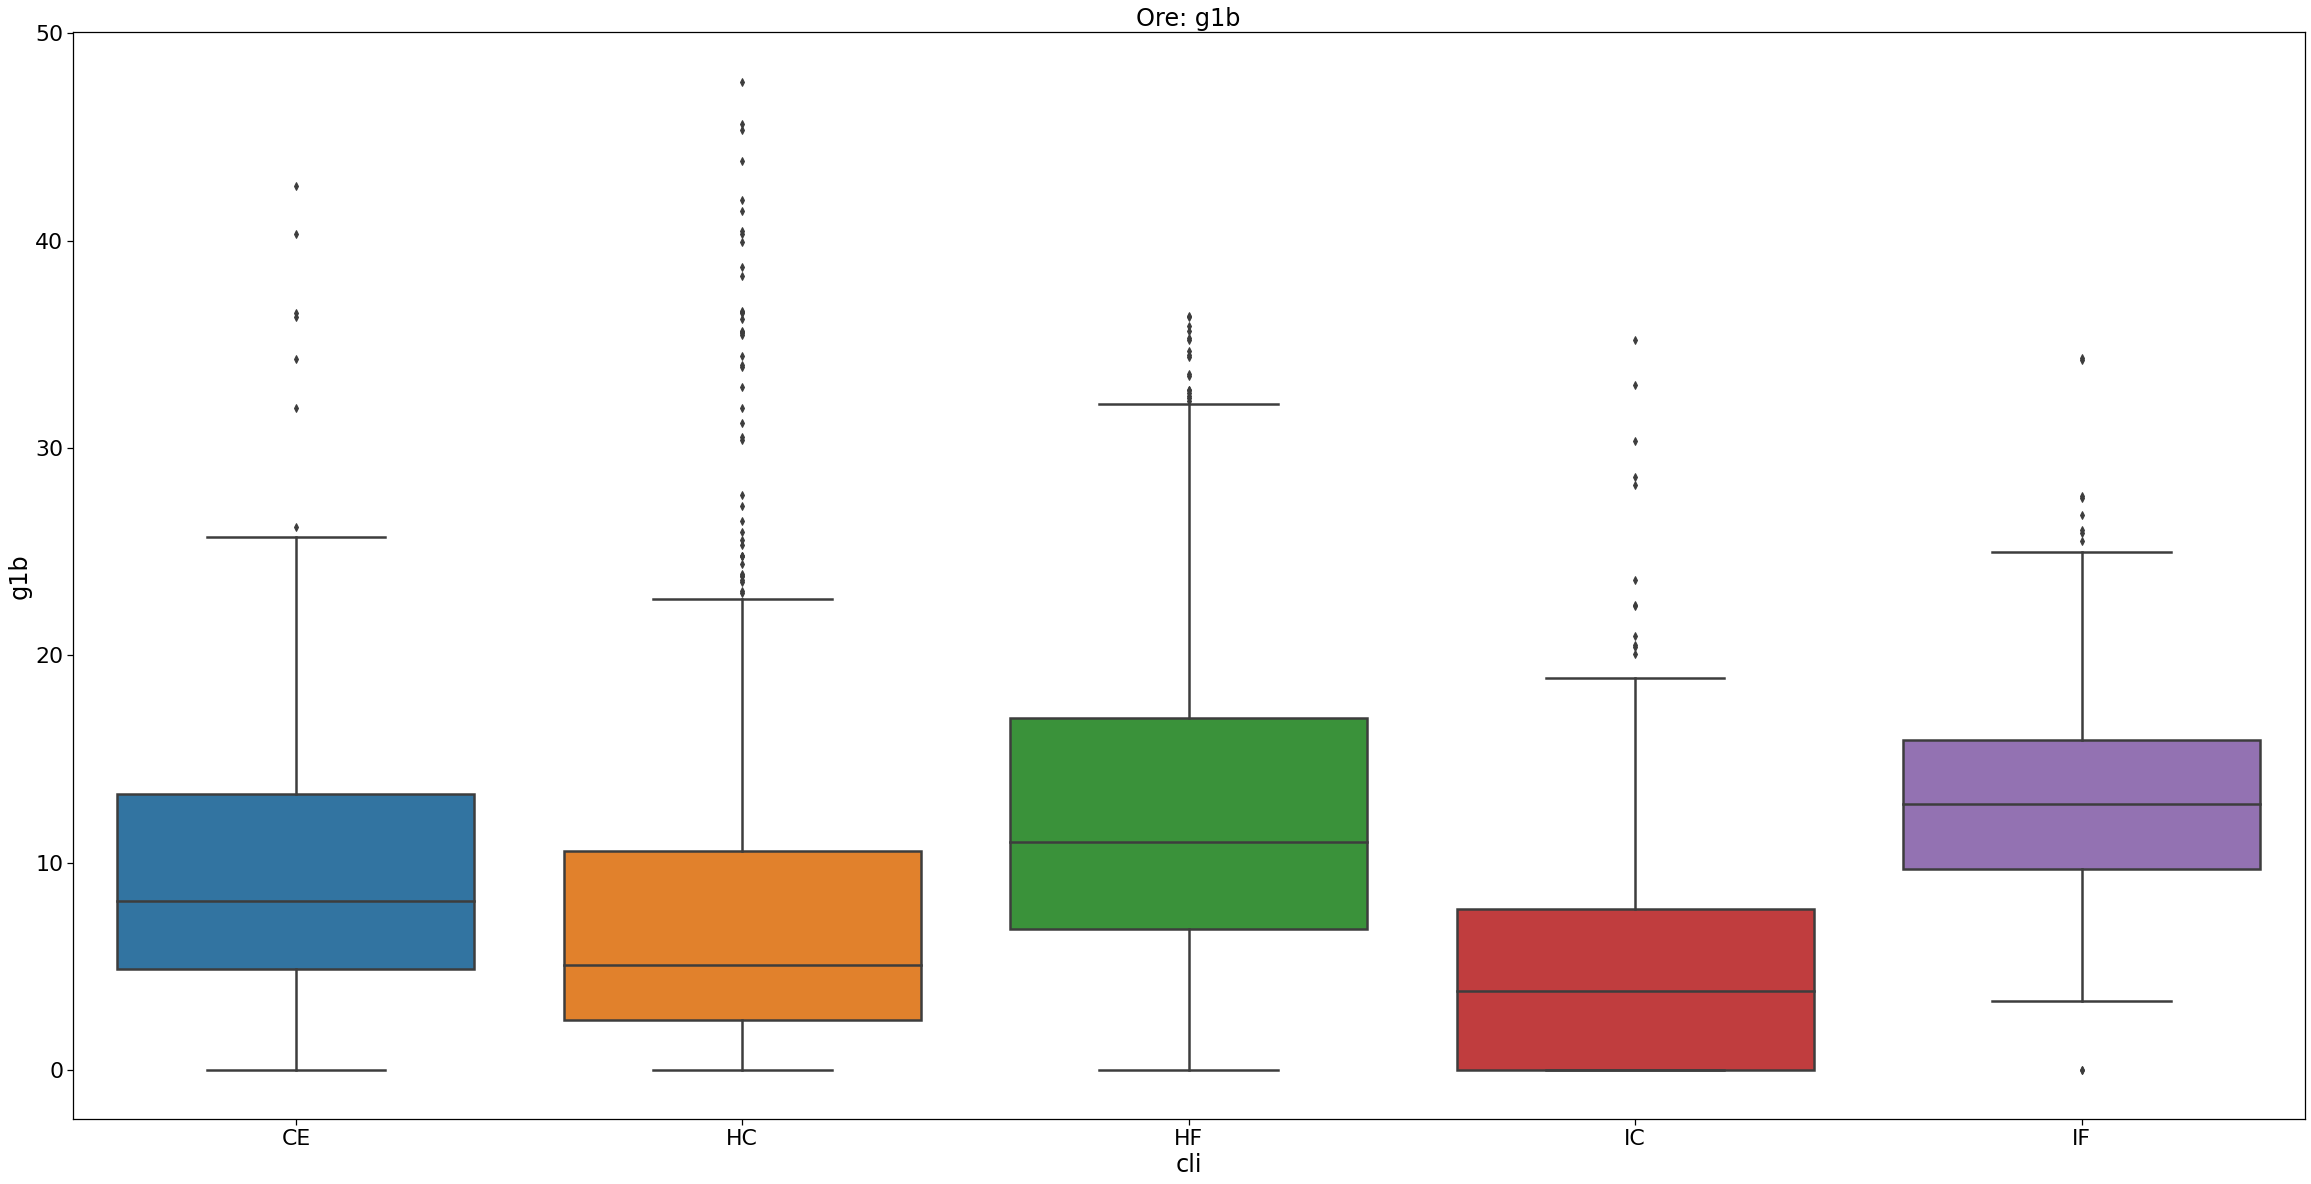

In [80]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'g1b'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## G3

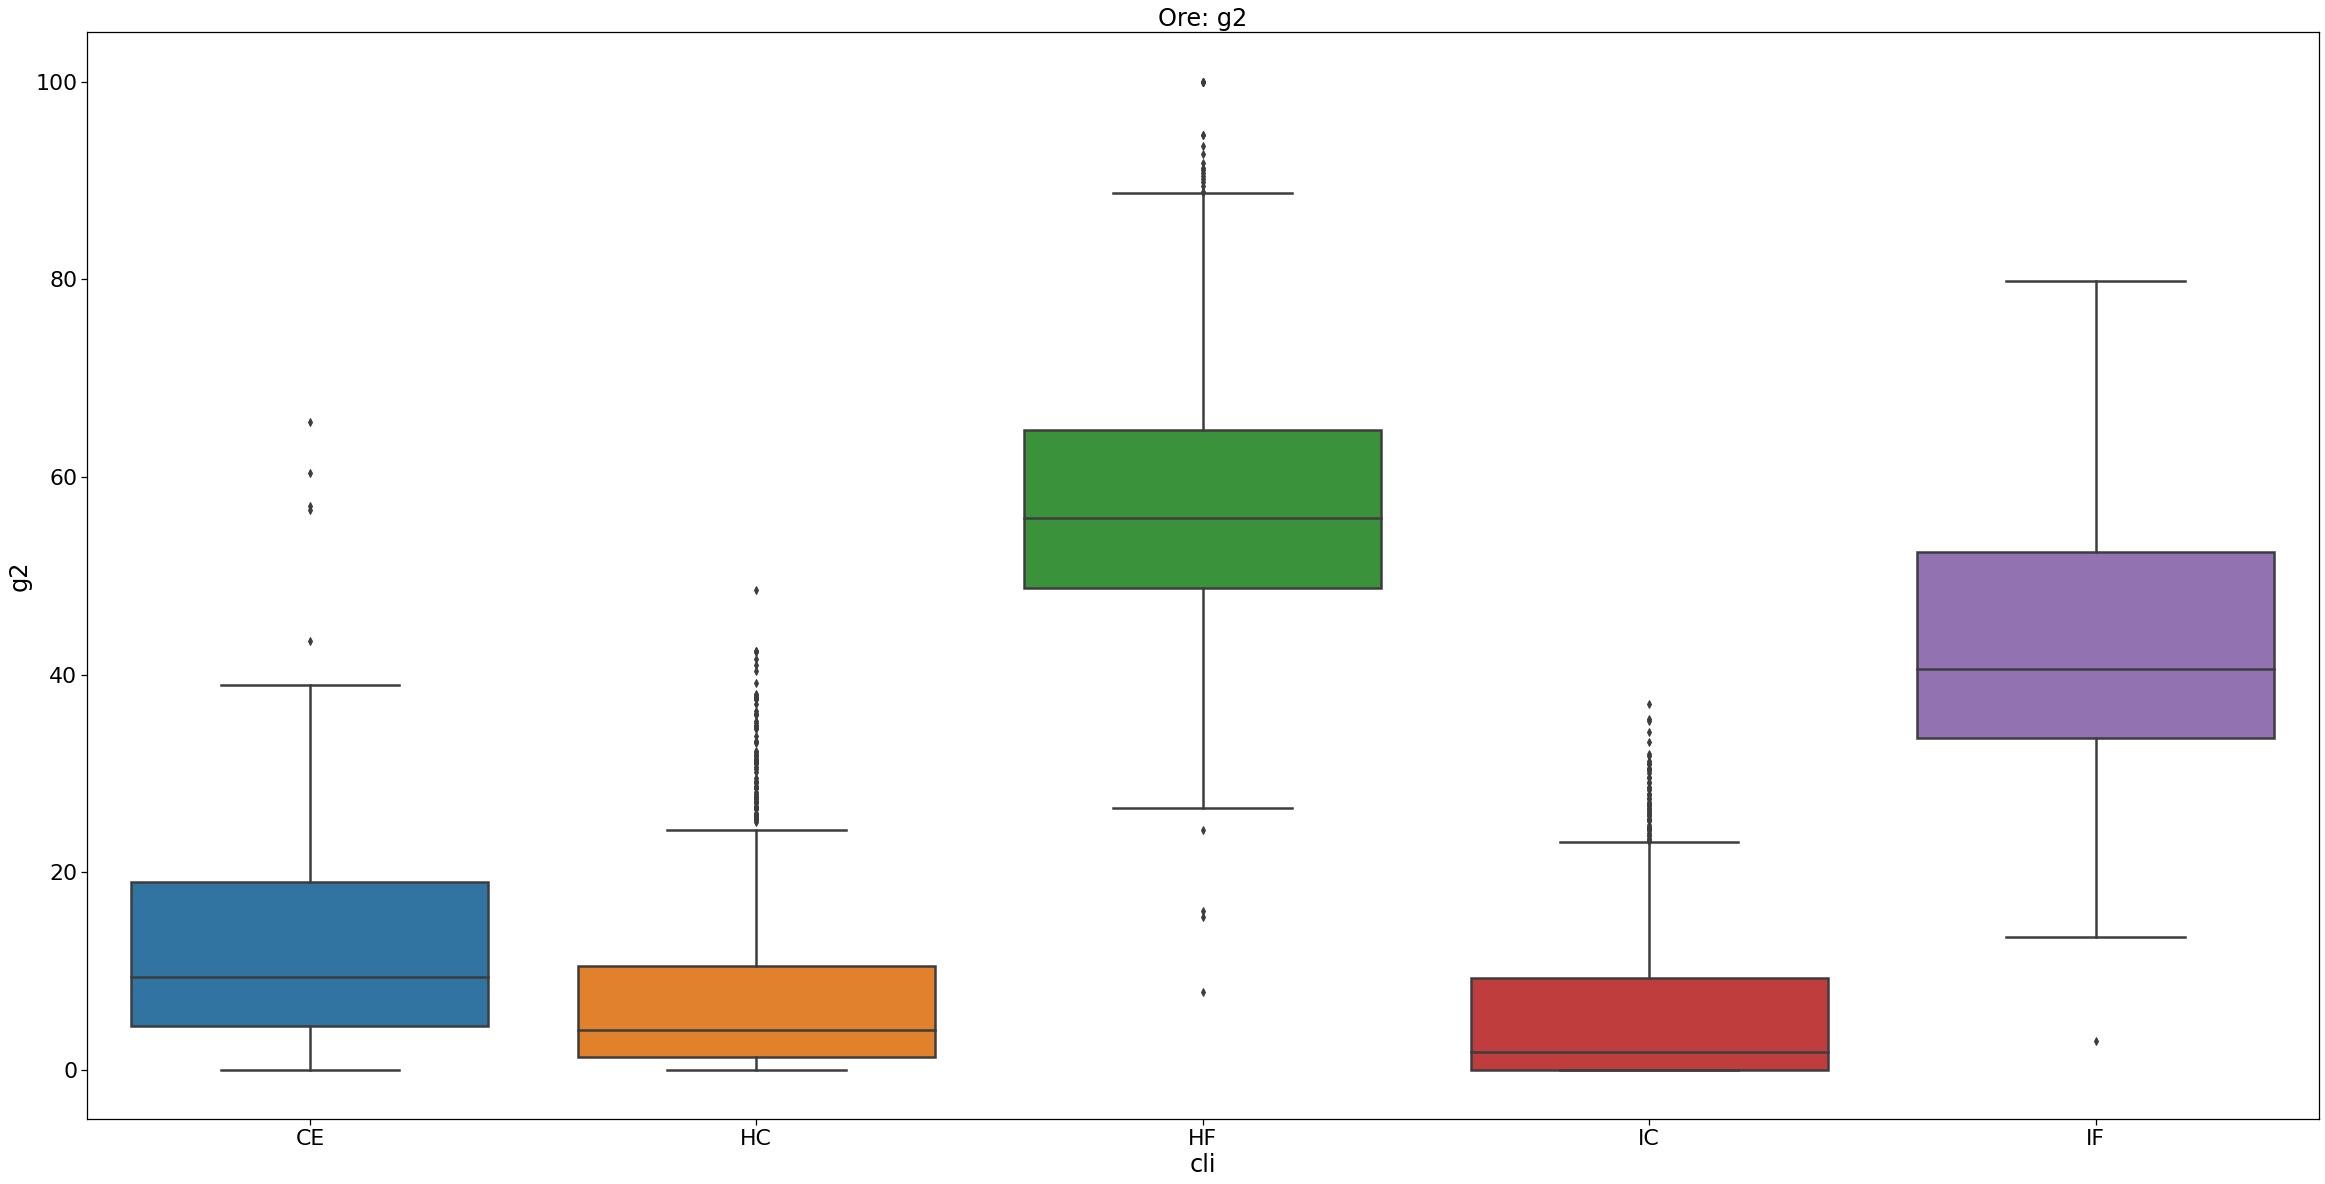

In [81]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'g2'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## G3

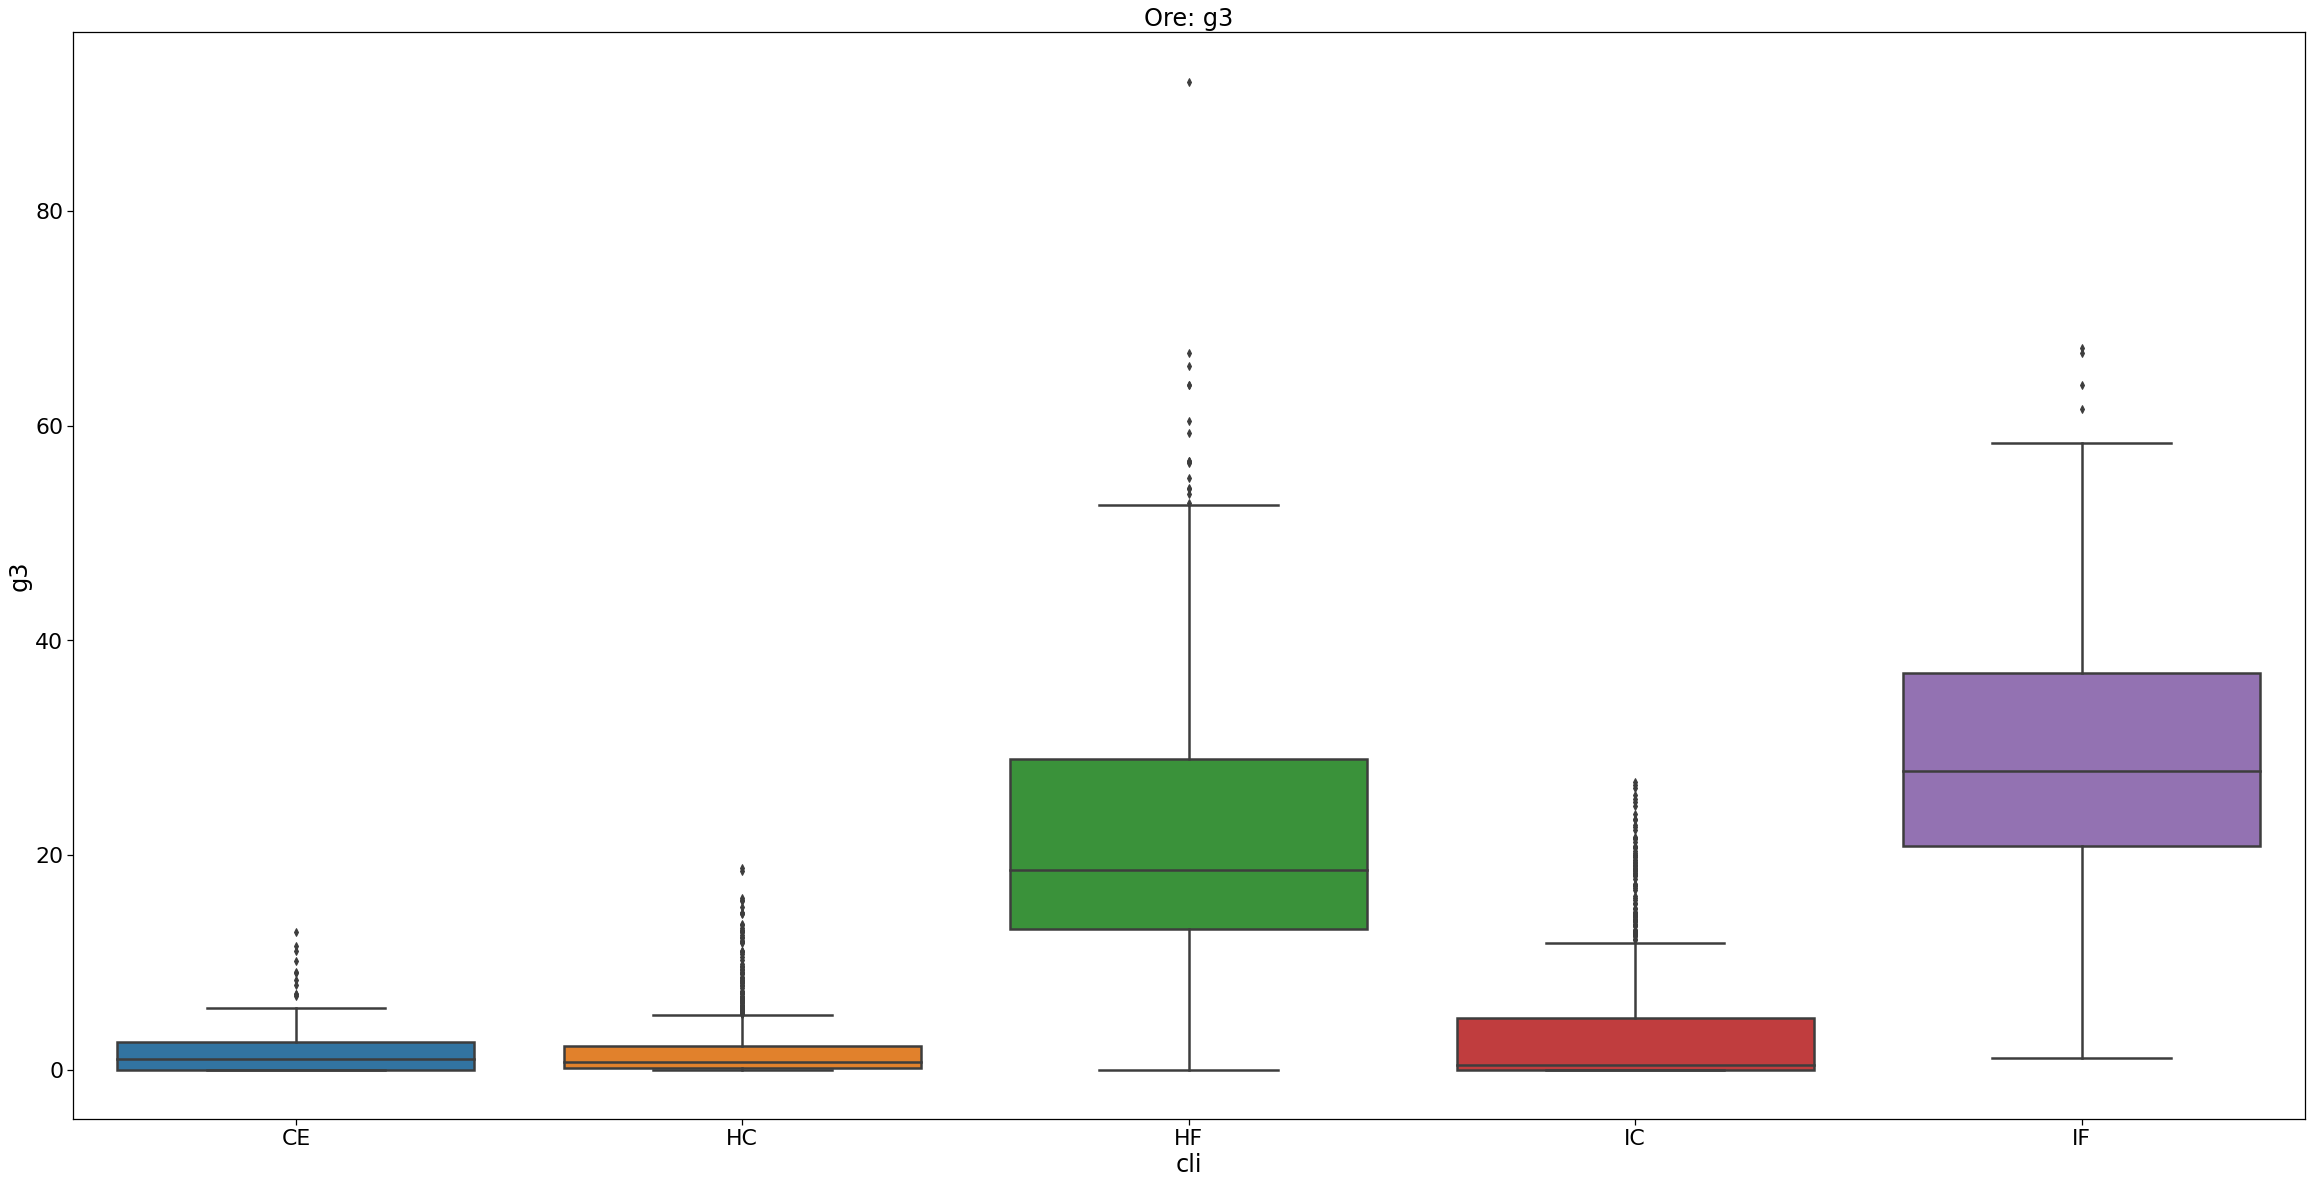

In [82]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'g3'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

In [83]:

df_gl = fso.loc[0:, 'cli':'pfgl']

In [84]:
df_gl.dropna(how='any').shape

(4414, 7)

In [85]:
df_gl2 = df_gl[df_gl['cli'].isin(str_ore)].dropna(how='any')
df_gl2

,cli,fegl,sigl,pgl,algl,mngl,pfgl
2,HC,68.200,0.400,0.070,0.700,0.100,0.900
3,HC,68.100,0.400,0.150,1.000,0.070,0.800
4,HC,69.300,0.100,0.050,0.200,0.050,0.400
5,HC,66.800,0.100,1.010,1.800,0.060,1.300
6,HC,68.400,0.500,0.030,0.600,0.080,0.700
7,HC,69.400,0.100,0.030,0.200,0.060,0.300
8,HC,69.000,0.200,0.050,0.300,0.110,0.400
10,HF,69.000,0.200,0.010,0.100,0.230,0.300
12,HC,69.300,0.100,0.010,0.100,0.160,0.300
14,HC,68.700,0.200,0.200,0.600,0.170,0.300


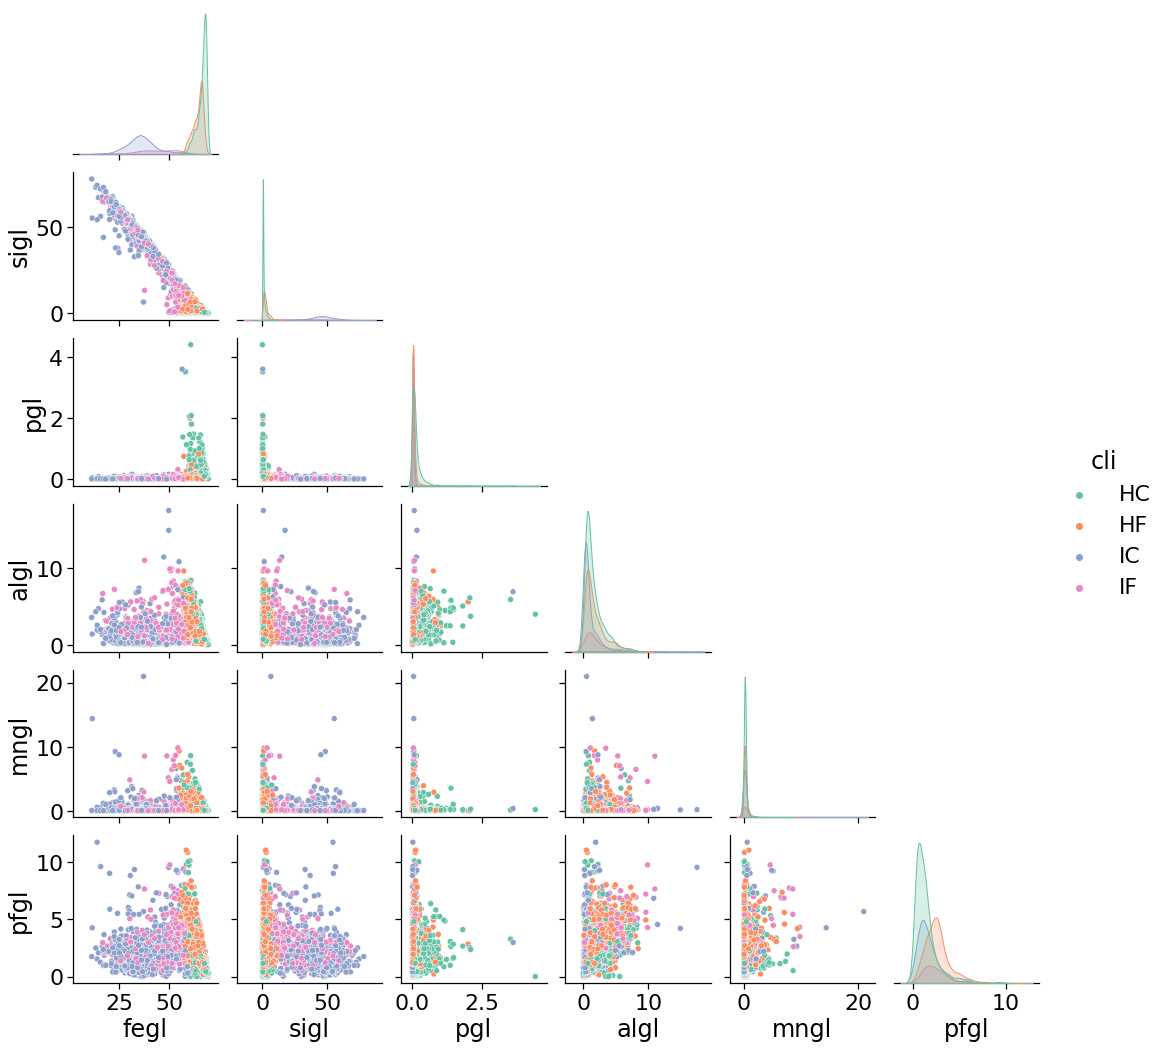

In [86]:
sea.pairplot(df_gl2, kind="scatter", hue="cli",  palette="Set2",  corner=True)
plt.pyplot.show()

In [87]:
df_gl3 = df_gl2[df_gl2['cli'].isin(basin_rocks)]

In [88]:
df_gl3.head()

,cli,fegl,sigl,pgl,algl,mngl,pfgl
705,IC,49.880,17.530,0.161,14.880,0.140,4.211
912,IF,51.317,11.645,0.084,9.872,0.172,4.284
1296,IC,46.785,22.050,0.027,6.920,0.183,2.300
1357,IC,52.071,14.204,0.079,7.580,0.114,2.100
1454,IC,47.410,15.037,0.142,11.413,0.377,4.550


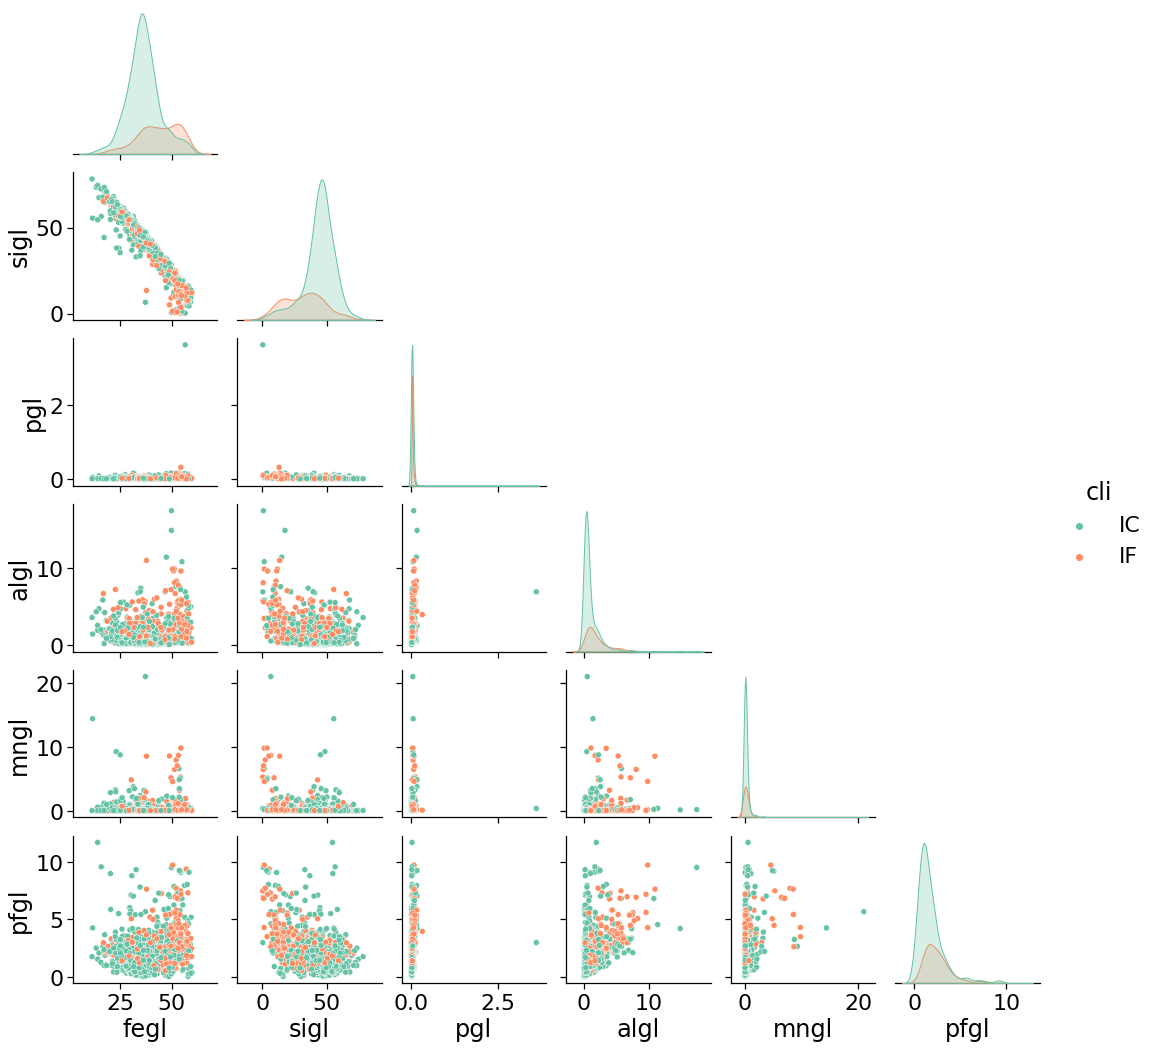

In [89]:
sea.pairplot(df_gl3, kind="scatter", hue="cli",  palette="Set2", corner=True)
plt.pyplot.show()

In [90]:
fso.groupby(['cli'])['fegl'].describe()


,count,mean,std,min,25%,50%,75%,max
cli,,,,,,,,
CE,256.0,61.472520,3.696680,41.730,59.31950,61.7285,64.19625,67.780
CQ,85.0,47.160235,6.783914,29.650,42.59700,49.0500,52.99000,59.370
DT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HC,1620.0,66.475476,2.460784,55.107,65.29975,67.2735,68.27150,69.711
HF,1080.0,64.391591,2.664043,55.008,62.67125,65.1585,66.44300,69.100
IC,903.0,36.276560,8.082696,11.185,31.56000,35.7870,40.37750,59.936
IF,330.0,43.491500,9.773055,16.712,36.57950,43.8485,52.06575,59.705
MD,183.0,48.723098,9.320253,12.300,43.34000,51.8340,56.00650,59.750
MS,1.0,26.890000,NaN,26.890,26.89000,26.8900,26.89000,26.890


array([[<AxesSubplot:title={'center':'CE'}>,
        <AxesSubplot:title={'center':'CQ'}>,
        <AxesSubplot:title={'center':'HC'}>],
       [<AxesSubplot:title={'center':'HF'}>,
        <AxesSubplot:title={'center':'IC'}>,
        <AxesSubplot:title={'center':'IF'}>],
       [<AxesSubplot:title={'center':'MD'}>,
        <AxesSubplot:title={'center':'MS'}>,
        <AxesSubplot:title={'center':'QT'}>]], dtype=object)

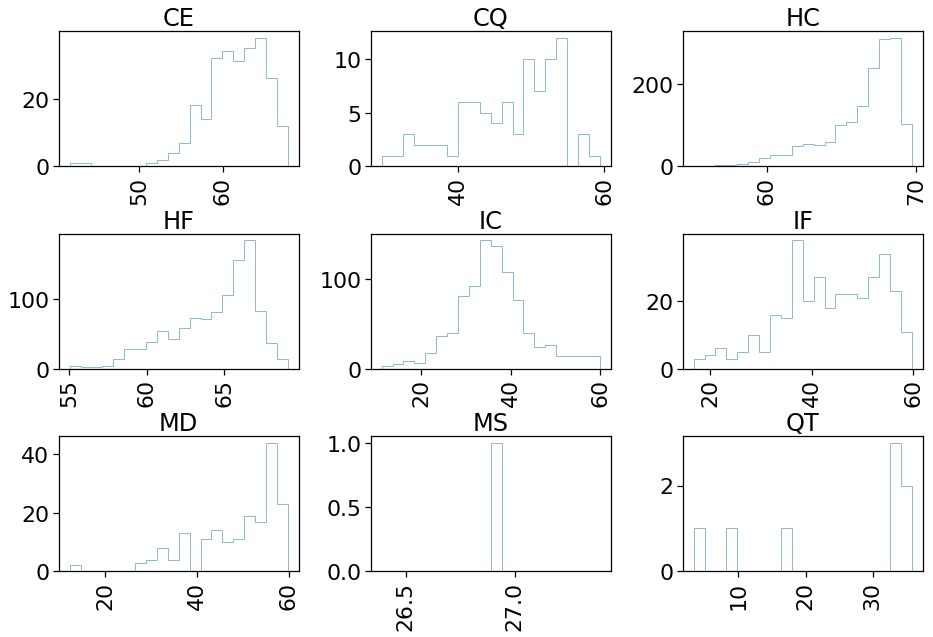

In [91]:
fso[fso['fegl']>=0.01].hist(by='cli', column='fegl', histtype='step', bins=20, figsize=(15,10), alpha=0.5)

In [92]:
# EXAMPLE: filterinfDataframe = dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]

array([[<AxesSubplot:title={'center':'CE'}>,
        <AxesSubplot:title={'center':'CQ'}>,
        <AxesSubplot:title={'center':'HC'}>],
       [<AxesSubplot:title={'center':'HF'}>,
        <AxesSubplot:title={'center':'IC'}>,
        <AxesSubplot:title={'center':'IF'}>],
       [<AxesSubplot:title={'center':'MD'}>,
        <AxesSubplot:title={'center':'MS'}>,
        <AxesSubplot:title={'center':'QT'}>]], dtype=object)

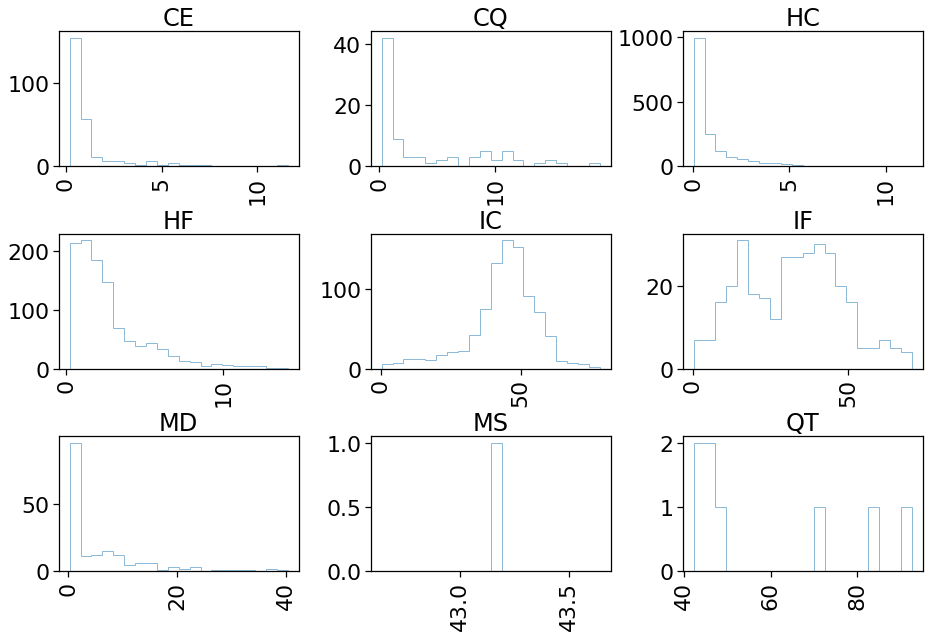

In [93]:
fso[fso['fegl']>=0.01].hist(by='cli', column='sigl', histtype='step', bins=20, figsize=(15,10), alpha=0.5)

array([[<AxesSubplot:title={'center':'CE'}>,
        <AxesSubplot:title={'center':'CQ'}>,
        <AxesSubplot:title={'center':'HC'}>],
       [<AxesSubplot:title={'center':'HF'}>,
        <AxesSubplot:title={'center':'IC'}>,
        <AxesSubplot:title={'center':'IF'}>],
       [<AxesSubplot:title={'center':'MD'}>,
        <AxesSubplot:title={'center':'MS'}>,
        <AxesSubplot:title={'center':'QT'}>]], dtype=object)

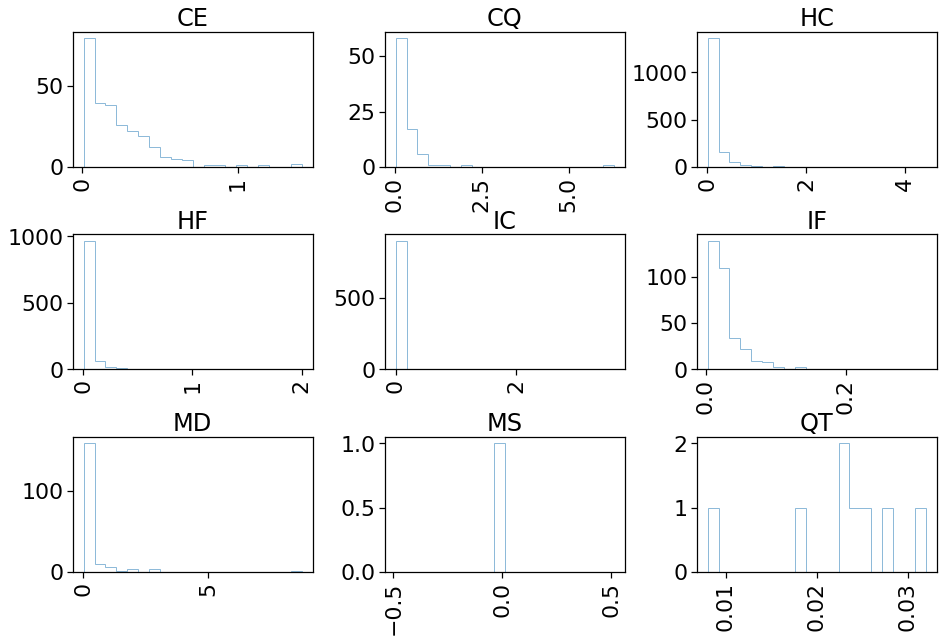

In [94]:
fso[fso['fegl']>=0.01].hist(by='cli', column='pgl', histtype='step', bins=20, figsize=(15,10), alpha=0.5)

array([[<AxesSubplot:title={'center':'CE'}>,
        <AxesSubplot:title={'center':'CQ'}>,
        <AxesSubplot:title={'center':'HC'}>],
       [<AxesSubplot:title={'center':'HF'}>,
        <AxesSubplot:title={'center':'IC'}>,
        <AxesSubplot:title={'center':'IF'}>],
       [<AxesSubplot:title={'center':'MD'}>,
        <AxesSubplot:title={'center':'MS'}>,
        <AxesSubplot:title={'center':'QT'}>]], dtype=object)

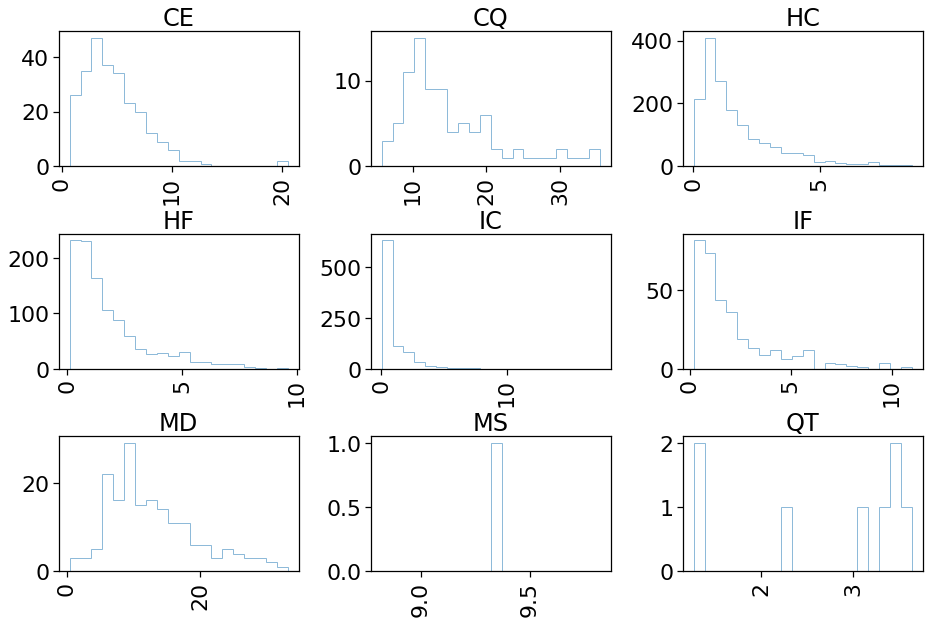

In [95]:
fso[fso['fegl']>=0.01].hist(by='cli', column='algl', histtype='step', bins=20, figsize=(15,10), alpha=0.5)

array([[<AxesSubplot:title={'center':'CE'}>,
        <AxesSubplot:title={'center':'CQ'}>,
        <AxesSubplot:title={'center':'HC'}>],
       [<AxesSubplot:title={'center':'HF'}>,
        <AxesSubplot:title={'center':'IC'}>,
        <AxesSubplot:title={'center':'IF'}>],
       [<AxesSubplot:title={'center':'MD'}>,
        <AxesSubplot:title={'center':'MS'}>,
        <AxesSubplot:title={'center':'QT'}>]], dtype=object)

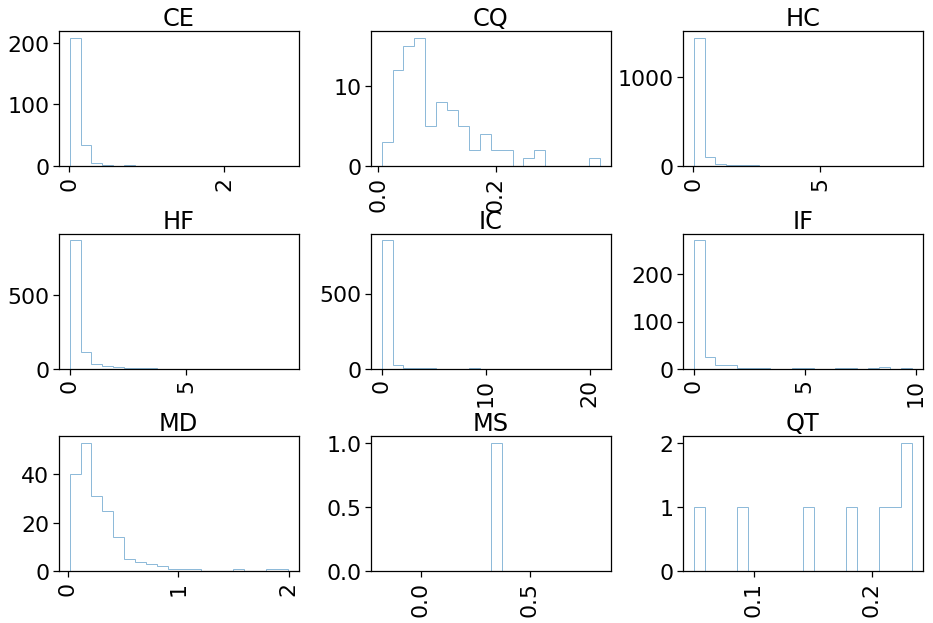

In [96]:
fso[fso['fegl']>=0.01].hist(by='cli', column='mngl', histtype='step', bins=20, figsize=(15,10), alpha=0.5)

array([[<AxesSubplot:title={'center':'CE'}>,
        <AxesSubplot:title={'center':'CQ'}>,
        <AxesSubplot:title={'center':'HC'}>],
       [<AxesSubplot:title={'center':'HF'}>,
        <AxesSubplot:title={'center':'IC'}>,
        <AxesSubplot:title={'center':'IF'}>],
       [<AxesSubplot:title={'center':'MD'}>,
        <AxesSubplot:title={'center':'MS'}>,
        <AxesSubplot:title={'center':'QT'}>]], dtype=object)

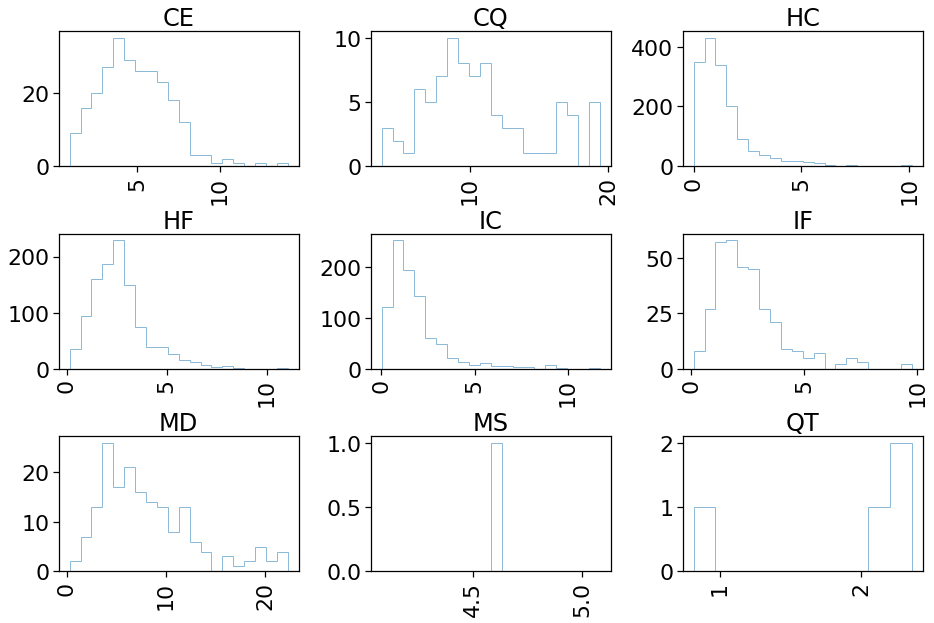

In [97]:
fso[fso['fegl']>=0.01].hist(by='cli', column='pfgl', histtype='step', bins=20, figsize=(15,10), alpha=0.5)

array([[<AxesSubplot:title={'center':'CE'}>,
        <AxesSubplot:title={'center':'CQ'}>,
        <AxesSubplot:title={'center':'HC'}>],
       [<AxesSubplot:title={'center':'HF'}>,
        <AxesSubplot:title={'center':'IC'}>,
        <AxesSubplot:title={'center':'IF'}>],
       [<AxesSubplot:title={'center':'MD'}>,
        <AxesSubplot:title={'center':'MS'}>,
        <AxesSubplot:title={'center':'QT'}>]], dtype=object)

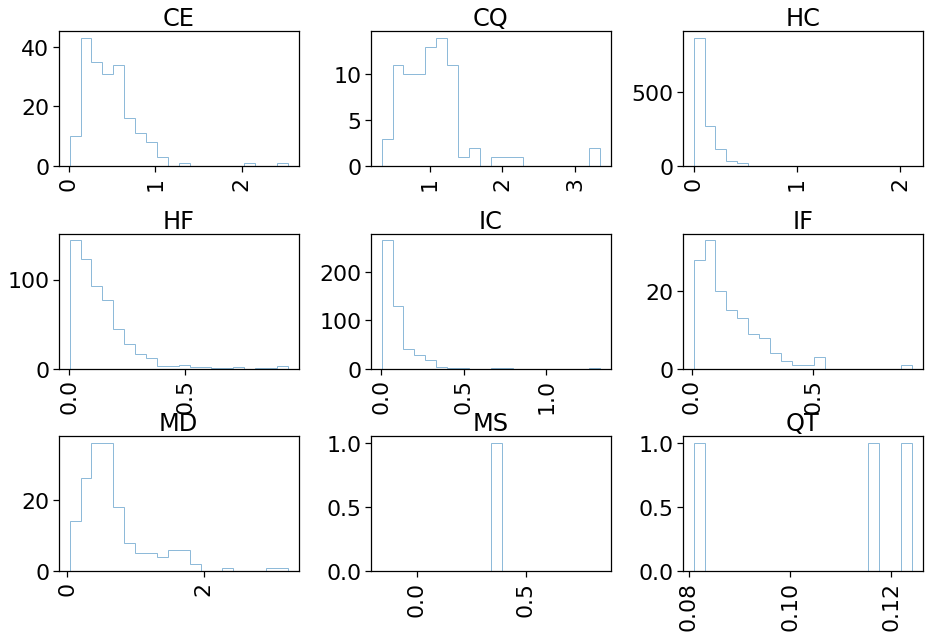

In [98]:
fso[fso['fegl']>=0.01].hist(by='cli', column='tigl', histtype='step', bins=20, figsize=(15,10), alpha=0.5)

array([[<AxesSubplot:title={'center':'CE'}>,
        <AxesSubplot:title={'center':'CQ'}>,
        <AxesSubplot:title={'center':'HC'}>],
       [<AxesSubplot:title={'center':'HF'}>,
        <AxesSubplot:title={'center':'IC'}>,
        <AxesSubplot:title={'center':'IF'}>],
       [<AxesSubplot:title={'center':'MD'}>,
        <AxesSubplot:title={'center':'MS'}>,
        <AxesSubplot:title={'center':'QT'}>]], dtype=object)

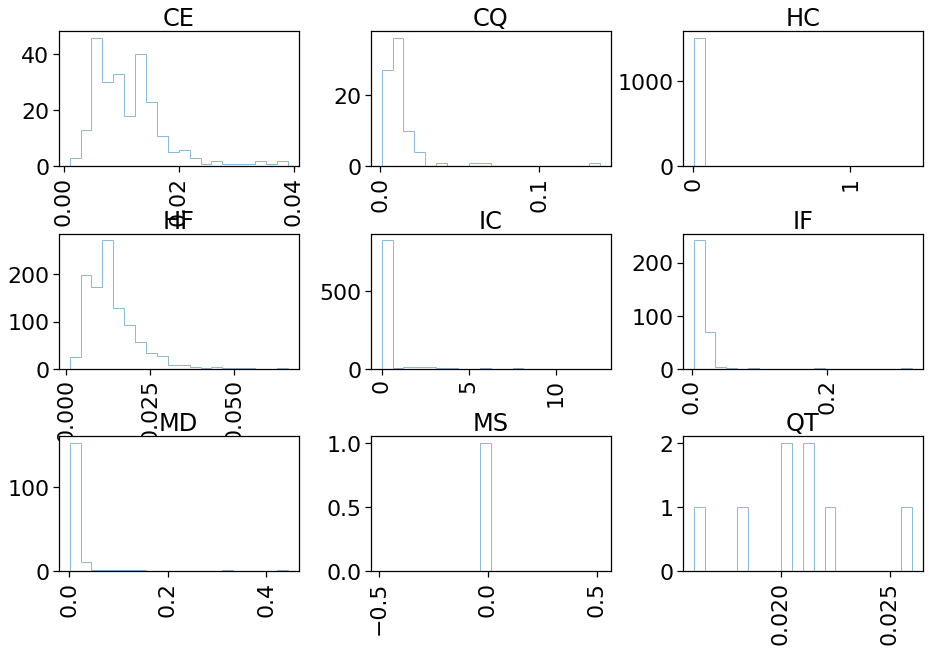

In [99]:
fso[fso['fegl']>=0.01].hist(by='cli', column='cagl', histtype='step', bins=20, figsize=(15,10), alpha=0.5)

array([[<AxesSubplot:title={'center':'CE'}>,
        <AxesSubplot:title={'center':'CQ'}>,
        <AxesSubplot:title={'center':'HC'}>],
       [<AxesSubplot:title={'center':'HF'}>,
        <AxesSubplot:title={'center':'IC'}>,
        <AxesSubplot:title={'center':'IF'}>],
       [<AxesSubplot:title={'center':'MD'}>,
        <AxesSubplot:title={'center':'MS'}>,
        <AxesSubplot:title={'center':'QT'}>]], dtype=object)

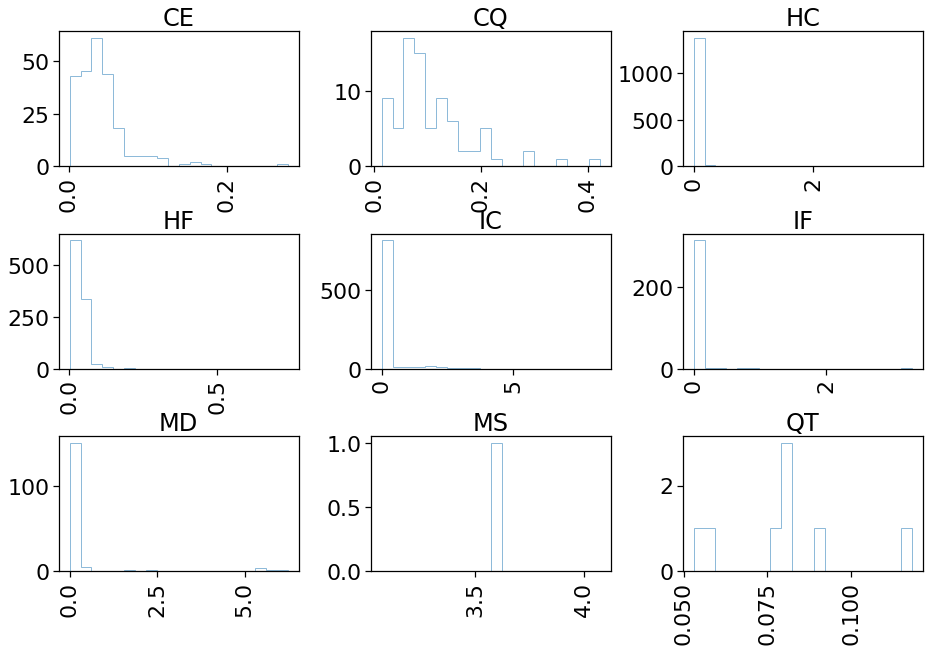

In [100]:
fso[fso['fegl']>=0.01].hist(by='cli', column='mggl', histtype='step', bins=20, figsize=(15,10), alpha=0.5)

array([[<AxesSubplot:title={'center':'algl'}>]], dtype=object)

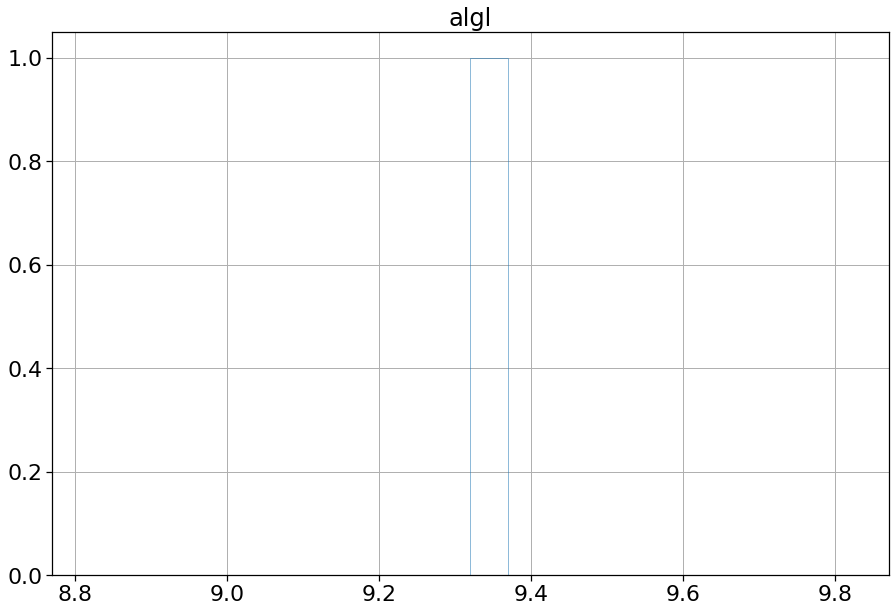

In [101]:
fso[fso['cli']=='MS'].hist(column='algl', histtype='step', bins=20, figsize=(15,10), alpha=0.5)

In [102]:
DF_MS=fso[fso['cli']=='MS']

In [103]:
DF_MS.to_csv("df_ms.csv")

cli
HC    AxesSubplot(0.125,0.125;0.775x0.755)
HF    AxesSubplot(0.125,0.125;0.775x0.755)
IC    AxesSubplot(0.125,0.125;0.775x0.755)
IF    AxesSubplot(0.125,0.125;0.775x0.755)
Name: fegl, dtype: object

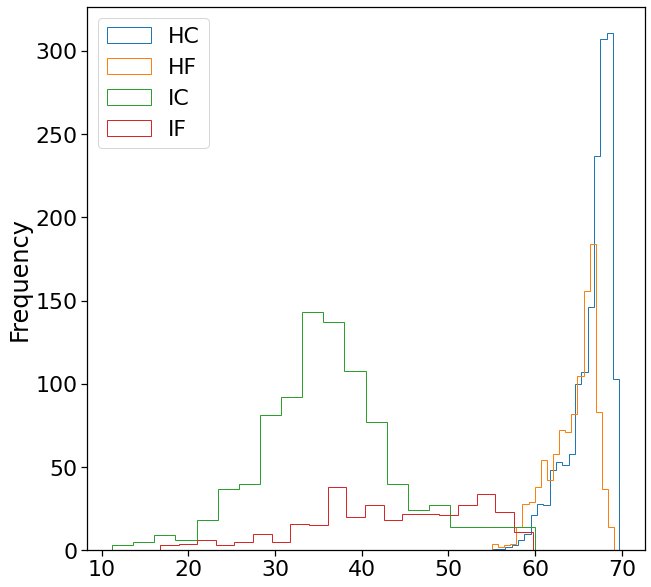

In [104]:
fso[(fso['cli'].isin(fresh_clean)) & (fso['fegl']>=0.01)].groupby(['cli']).fegl.plot.hist(stacked=True, \
                                                                                                    
    histtype='step', bins=20, figsize=(10,10), legend=True)

In [105]:
cac[(cac['geocod'].isin(fresh_clean)) & (cac['compid']=='10M_FLP')].groupby(['geocod']).fegl.plot.hist(stacked=True, \
                                                                                                    
    histtype='step', bins=20, figsize=(10,10), legend=True, density=True)

NameError: name 'cac' is not defined

In [ ]:
g=sea.PairGrid(df_gl2, hue="cli",corner=True)
g.map_lower(sea.kdeplot,hue=None,levels=5,color=".2")
g.map_lower(sea.scatterplot,marker="+")
g.map_diag(sea.histplot,element="step",linewidth=0,kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))